In [1]:
from __future__ import print_function

import numpy as np

import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import json
import os
import mne
import copy

import ecogtools

In [2]:
%matplotlib inline

In [3]:
patient_num = "2003"

channels = ['RTG1', 'RTG2','RTG3','RTG4','RTG5',
           'RTG6','RTG7','RTG8','RTG9','RTG10',
           'RTG11','RTG12','RTG13','RTG14','RTG15',
           'RTG16','RTG17','RTG18','RTG19','RTG20',
           'RTG21','RTG22','RTG23','RTG24','RTG25',
           'RTG26','RTG27','RTG28','RTG29','RTG30',
           'RTG31','RTG32']

In [4]:
data = ecogtools.bio_motion_task_nocontrol(patient_num)

Extracting edf Parameters from patient_2002/john_2002.edf...
Setting channel info structure...
Creating Raw.info structure...
Ready.


In [5]:
# Get the times for task from behavioral data
tmin = int(data.trig_and_behav.loc[0, 'trigger_time']-10)
tmax = int(data.trig_and_behav.loc[107, 'trigger_time']+10)

# Get only physiology data that we actually want to look at for task.
data.phys.crop(tmin=tmin, tmax=tmax)

<RawEDF  |  john_2002.edf, n_channels x n_times : 129 x 782001 (391.0 sec), ~222 kB, data not loaded>

In [6]:
# Load data and pick only channels that we care about.
data.phys.load_data()
data.phys.pick_channels(channels)

Reading 0 ... 782000  =      0.000 ...   391.000 secs...


<RawEDF  |  john_2002.edf, n_channels x n_times : 32 x 782001 (391.0 sec), ~191.0 MB, data loaded>

In [7]:
# Create epochs object for trial viz and averaging.
data.initialize_epochs_object(channels, tmin=-6., tmax=6., baseline=None)

72 matching events found
0 projection items activated
Loading data for 72 events and 24001 original time points ...
0 bad epochs dropped


In [32]:
# Create evoked for Question Start
bio_dir_evoked = data.create_evoked("Direction-Bio/trial_type")
#contr_dir_evoked = data.create_evoked("Direction-Control/trial_type")
#QS_evoked = mne.combine_evoked([contr_dir_evoked, bio_dir_evoked], weights=[1, -1])


In [9]:
# BANDPASS FILTER: Define frequencies, cycles and bandwidth
freqs = np.linspace(50, 150, 25)
n_cycles = freqs/2.0
time_bandwidth = 8.0

In [10]:
# Calculate power for Q Start high gamma ()
#contr_dir_power = mne.time_frequency.tfr_multitaper(data.epochs['Direction-Control/trial_type'], freqs=freqs, n_cycles=n_cycles,
 #                      time_bandwidth=time_bandwidth, return_itc=False)
bio_dir_power = mne.time_frequency.tfr_multitaper(data.epochs['Direction-Bio/trial_type'], freqs=freqs, n_cycles=n_cycles,
                       time_bandwidth=time_bandwidth, return_itc=False)
#QS_power = data.compute_diff_power(contr_dir_power, bio_dir_power)

In [11]:
# Copy data class for Filter-Hilbert Transform
data_filt = copy.copy(data)
data_filt.phys.filter(50, 150)
data_filt.phys.apply_hilbert(envelope=True)

Setting up band-pass filter from 50 - 1.5e+02 Hz
l_trans_bandwidth chosen to be 12.5 Hz
h_trans_bandwidth chosen to be 37.5 Hz
Filter length of 1056 samples (0.528 sec) selected


<RawEDF  |  john_2002.edf, n_channels x n_times : 32 x 782001 (391.0 sec), ~191.0 MB, data loaded>

In [12]:
# New epochs object for filtered/HT data
data_filt.initialize_epochs_object(channels, tmin=-6., tmax=6., baseline=None)

72 matching events found
0 projection items activated
Loading data for 72 events and 24001 original time points ...
0 bad epochs dropped


In [31]:
# Evoked Power for Question Start sad-neutral/happy
bio_dir_evoked_filt = data_filt.create_evoked("Direction-Bio/trial_type")
#contr_dir_evoked_filt = data_filt.create_evoked("Direction-Control/trial_type")
#QS_filt = mne.combine_evoked([contr_dir_evoked_filt, bio_dir_evoked_filt], weights = [1, -1])

In [14]:
# Define frequencies, cycles and bandwidth
freqs = np.geomspace(1, 50, 50)
n_cycles = freqs/2.0
print(freqs)

[  1.           1.08311073   1.17312885   1.27062844   1.37623129
   1.49061088   1.61449663   1.74867862   1.89401257   2.05142534
   2.22192079   2.40658624   2.60659937   2.82323575   3.05787692
   3.3120193    3.58728363   3.88542538   4.20834591   4.5581046
   4.93693199   5.347244     5.79165734   6.27300619   6.7943603
   7.35904453   7.97066007   8.63310743   9.35061127  10.12774737
  10.96947182  11.88115261  12.86860384  13.93812287  15.0965304
  16.35121402  17.71017531  19.18208087  20.77631756  22.50305243
  24.37329749  26.39897997  28.5930184   30.96940496  33.54329473
  36.33110236  39.3506067   42.62106425  46.1633319   50.        ]


In [15]:
# Calculate power for Question Start low freq
#low_contr_dir_power = mne.time_frequency.tfr_morlet(data.epochs['Direction-Control/trial_type'], freqs=freqs, n_cycles=n_cycles,
 #                   return_itc=False)
low_bio_dir_power = mne.time_frequency.tfr_morlet(data.epochs['Direction-Bio/trial_type'], freqs=freqs, n_cycles=n_cycles,
                    return_itc=False)
#low_QS_power = data.compute_diff_power(low_contr_dir_power, low_bio_dir_power)

In [16]:
# Copy data class for Filter-Hilbert Transform
data_filt = copy.copy(data)
data_filt.phys.filter(1, 50)
data_filt.phys.apply_hilbert(envelope=True)

Setting up band-pass filter from 1 - 50 Hz
l_trans_bandwidth chosen to be 1.0 Hz
h_trans_bandwidth chosen to be 12.5 Hz
Filter length of 13200 samples (6.600 sec) selected


<RawEDF  |  john_2002.edf, n_channels x n_times : 32 x 782001 (391.0 sec), ~191.0 MB, data loaded>

In [17]:
# New epochs object for filtered/HT data
data_filt.initialize_epochs_object(channels, tmin=-6., tmax=6., baseline=None)

72 matching events found
0 projection items activated
Loading data for 72 events and 24001 original time points ...
0 bad epochs dropped


# Plots


In [18]:
# Choose channels and define parameters for all functions
channel_of_interest = "RTG31"
index = channels.index(channel_of_interest)
COI = [index]

# Times and baseline periods for QS/TR
# Times and baseline periods for QS/TR
QS_times = {"tmin":-1., "tmax":4.}
QS_baseline = (-1., 0)


In [19]:
%matplotlib inline

Applying baseline correction (mode: ratio)
Applying baseline correction (mode: ratio)
Applying baseline correction (mode: ratio)
Applying baseline correction (mode: ratio)
Applying baseline correction (mode: ratio)
Applying baseline correction (mode: ratio)
Applying baseline correction (mode: ratio)
Applying baseline correction (mode: ratio)
Applying baseline correction (mode: ratio)
Applying baseline correction (mode: ratio)
Applying baseline correction (mode: ratio)
Applying baseline correction (mode: ratio)
Applying baseline correction (mode: ratio)
Applying baseline correction (mode: ratio)
Applying baseline correction (mode: ratio)
Applying baseline correction (mode: ratio)
Applying baseline correction (mode: ratio)
Applying baseline correction (mode: ratio)
Applying baseline correction (mode: ratio)
Applying baseline correction (mode: ratio)
Applying baseline correction (mode: ratio)
Applying baseline correction (mode: ratio)
Applying baseline correction (mode: ratio)
Applying ba

/Users/Whitehead/anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:516: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


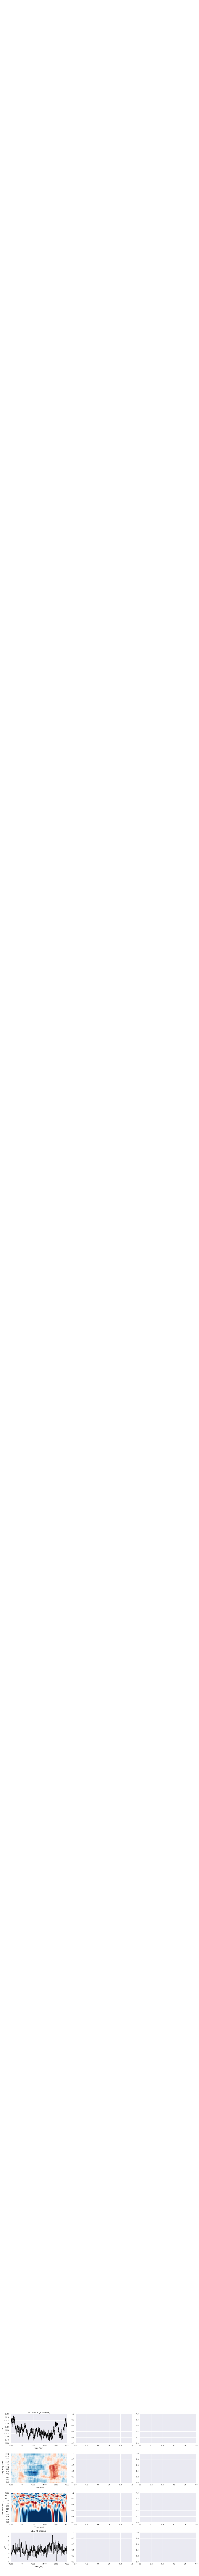

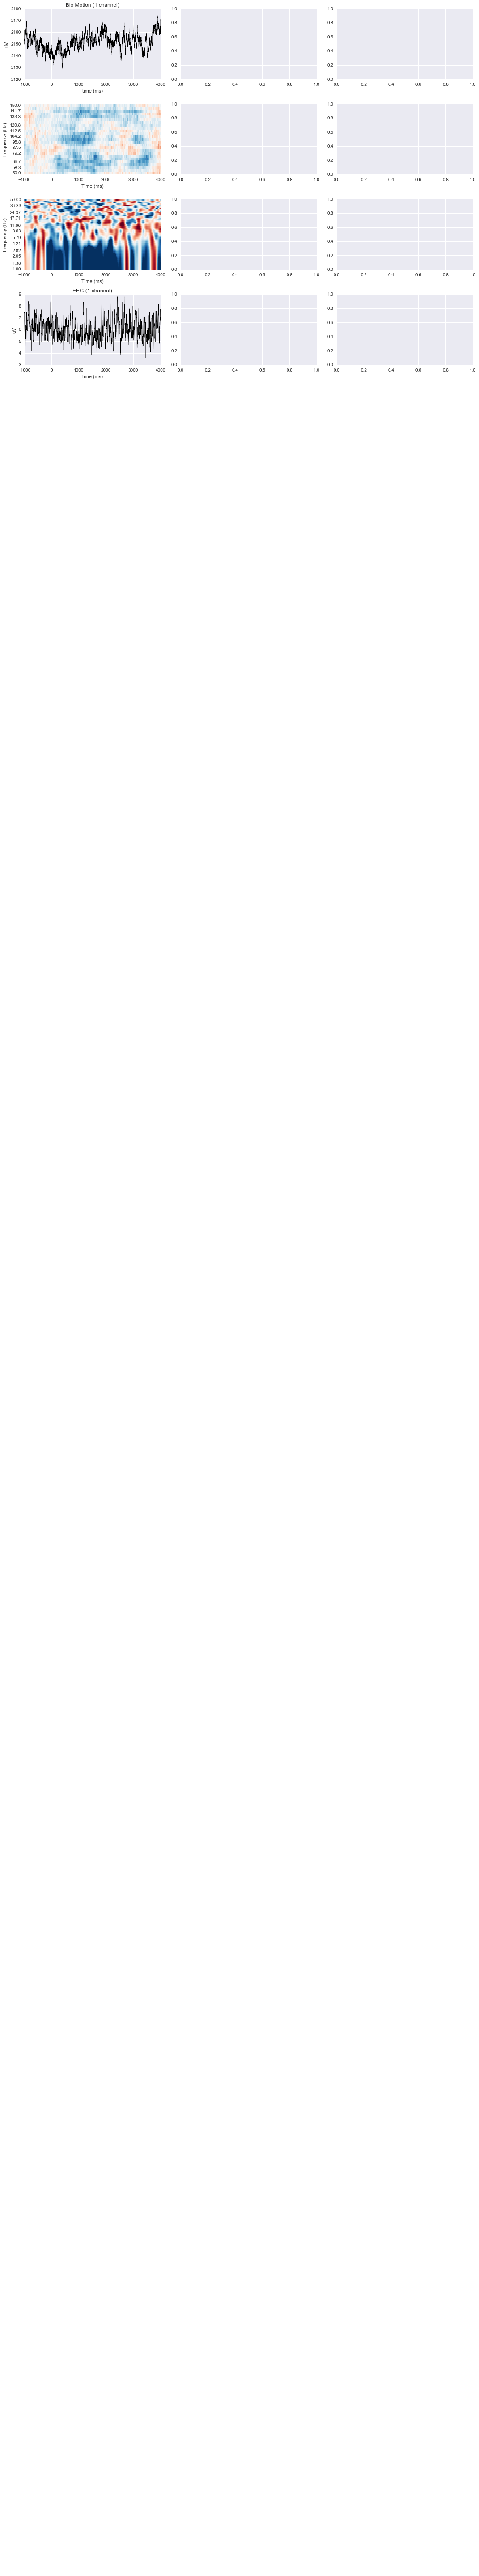

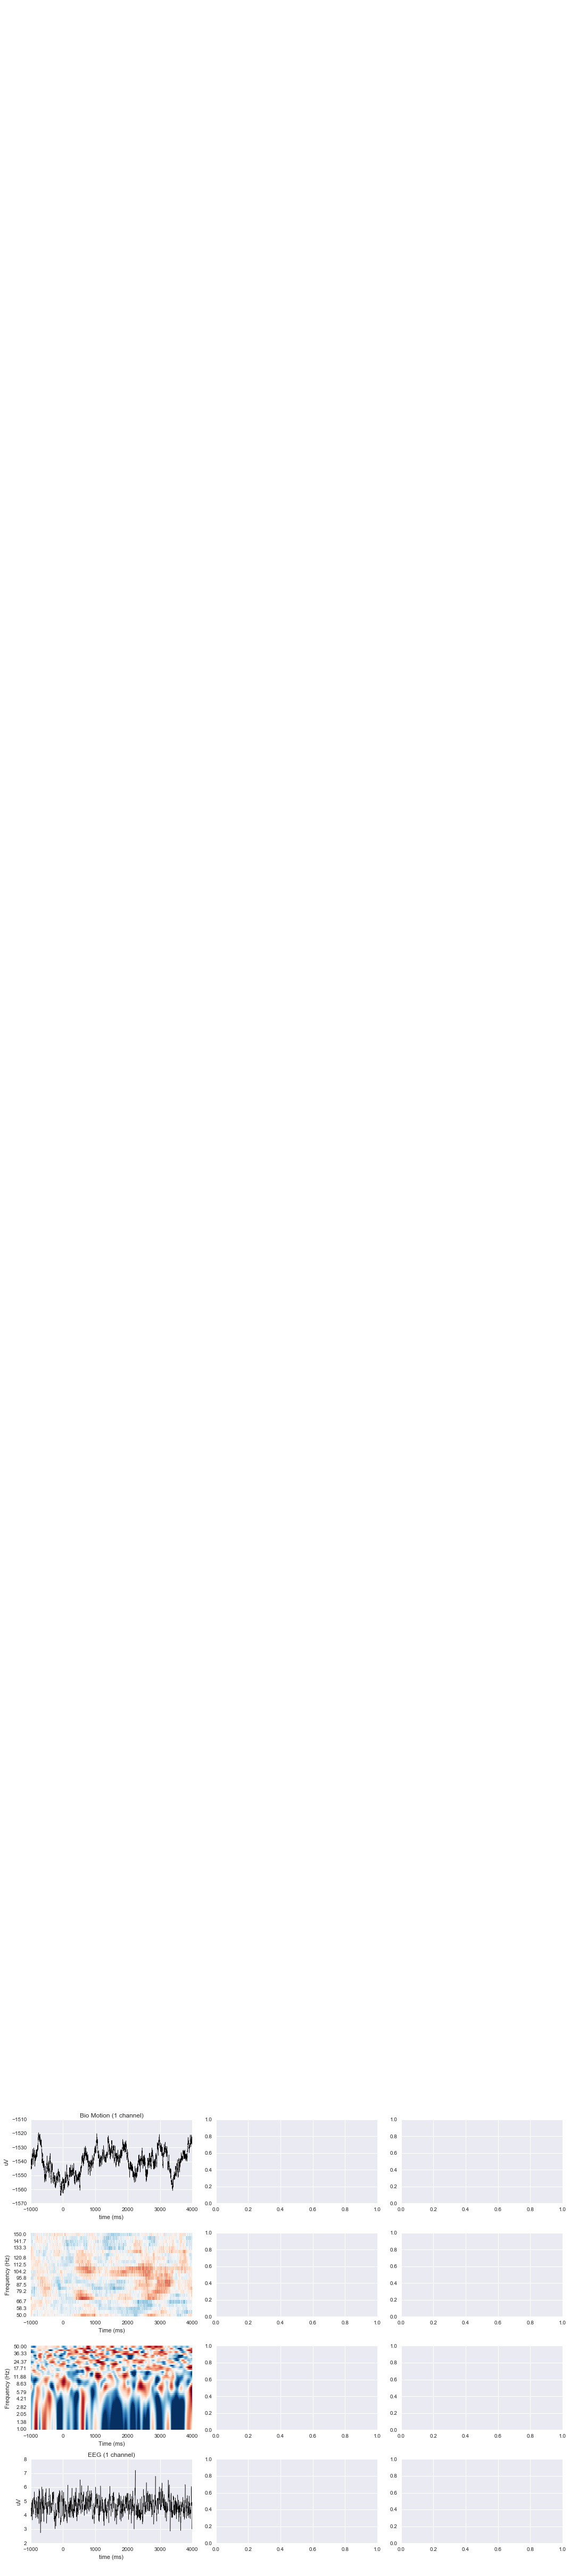

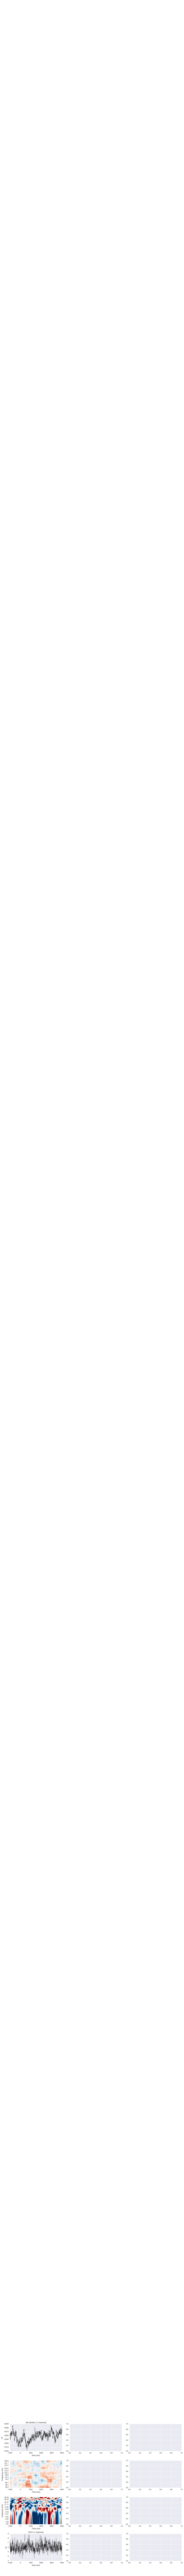

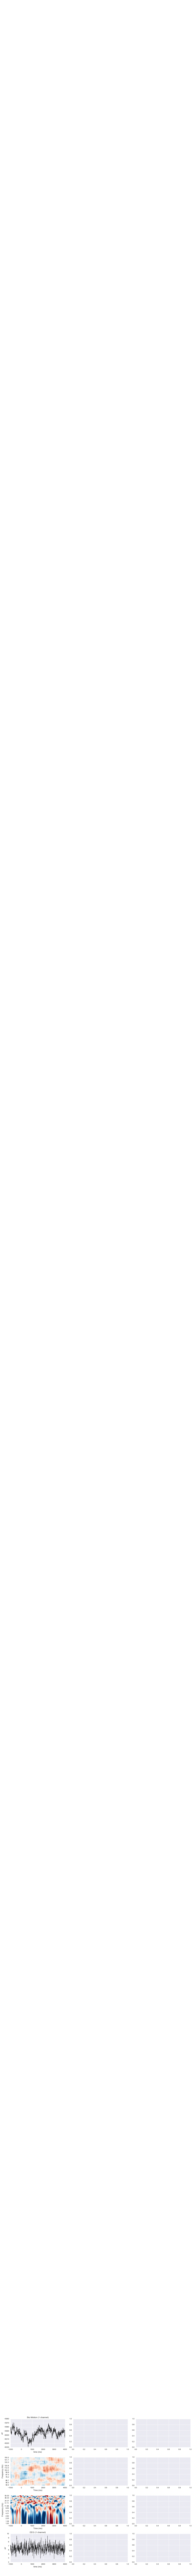

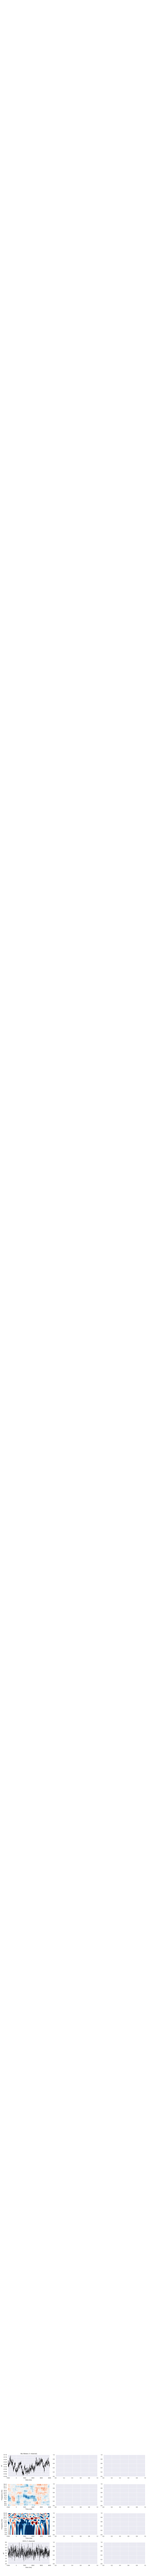

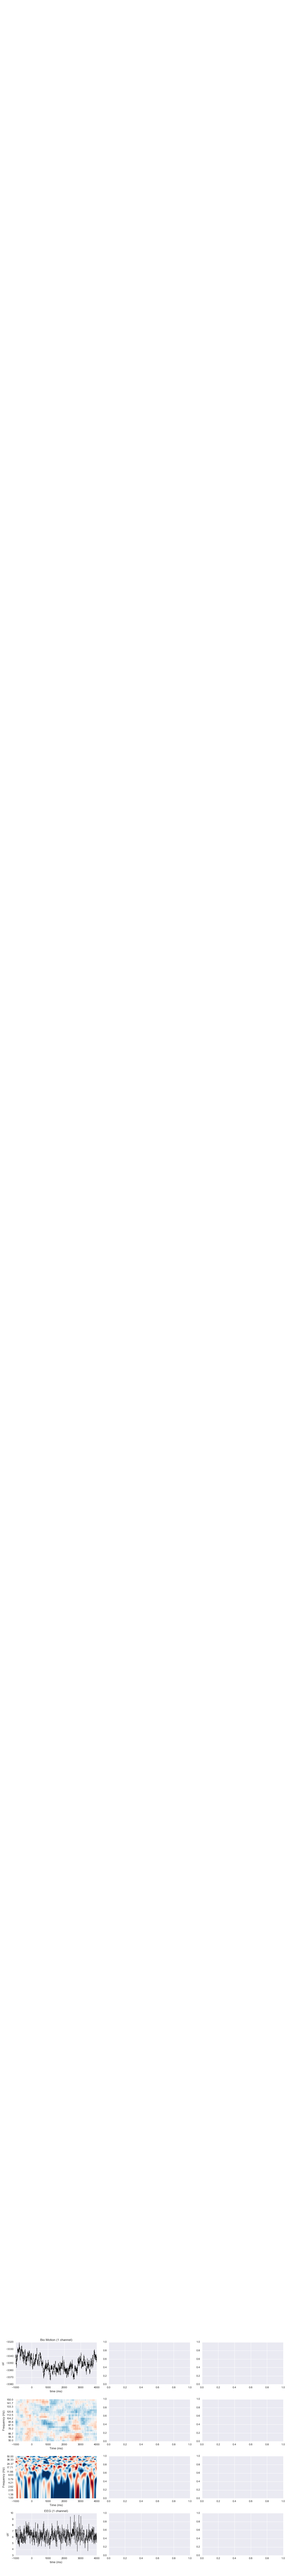

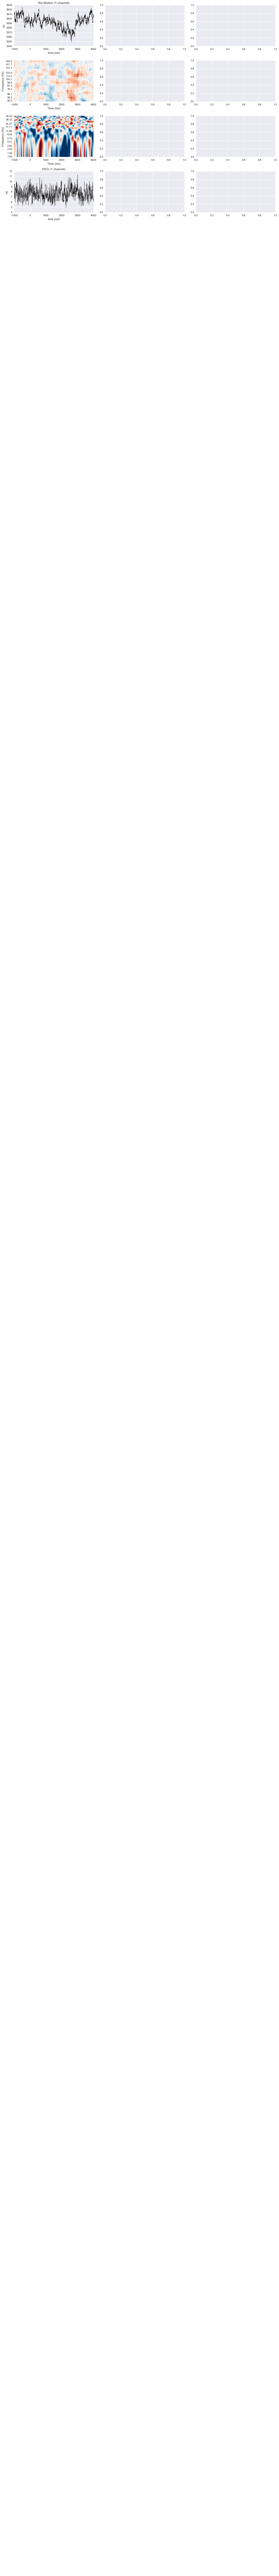

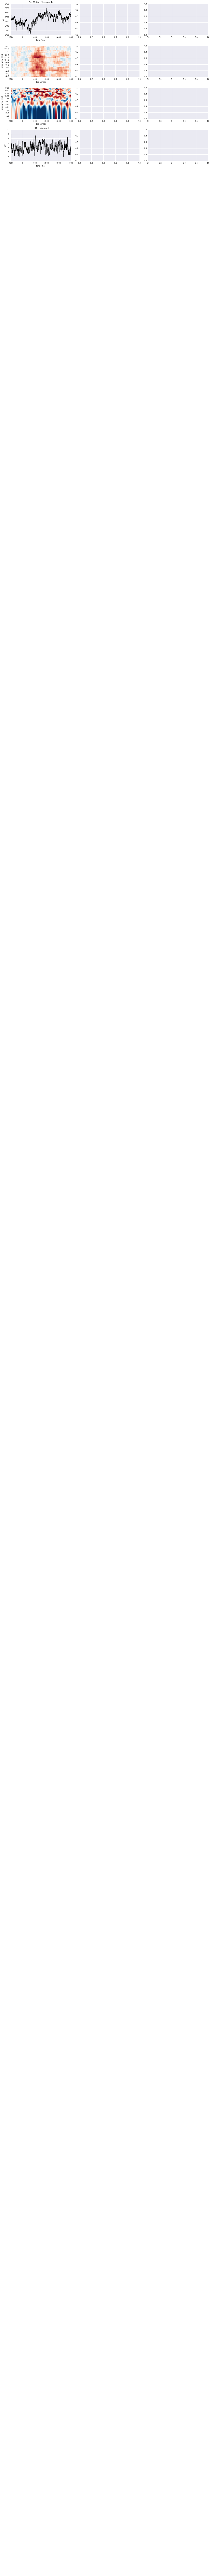

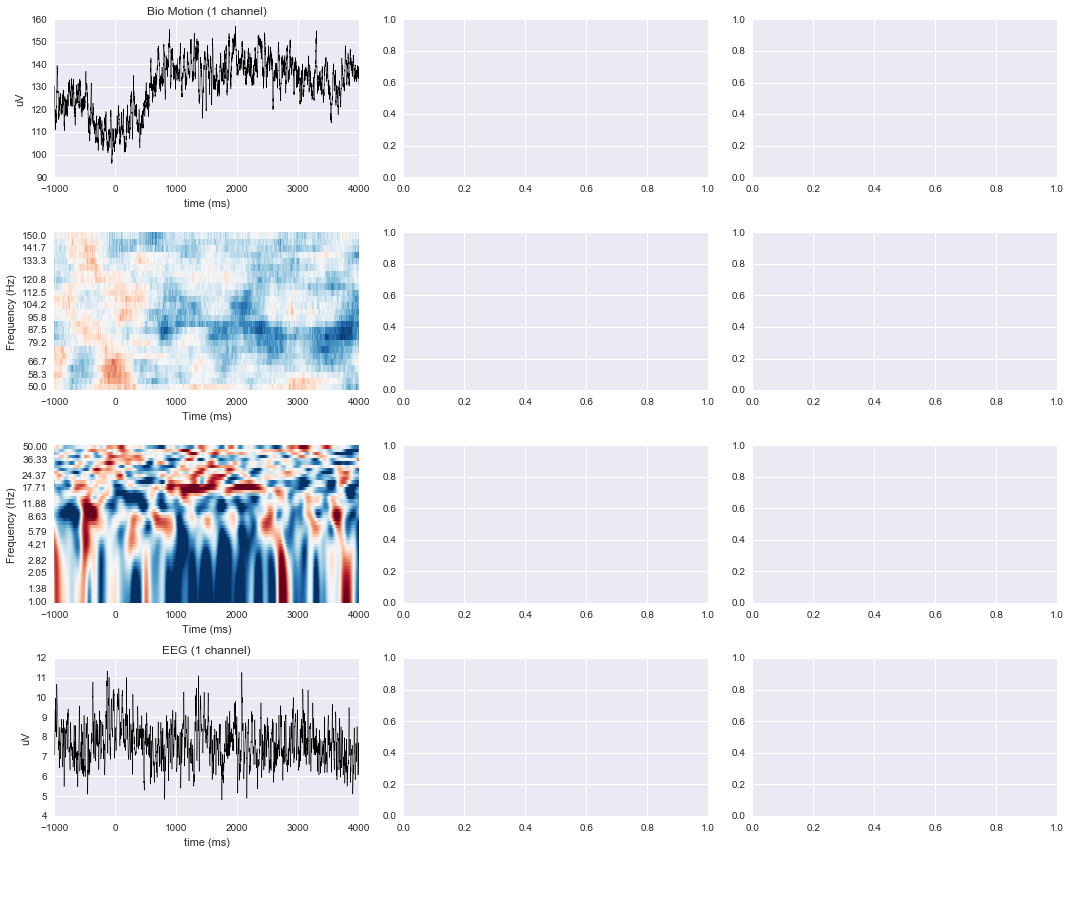

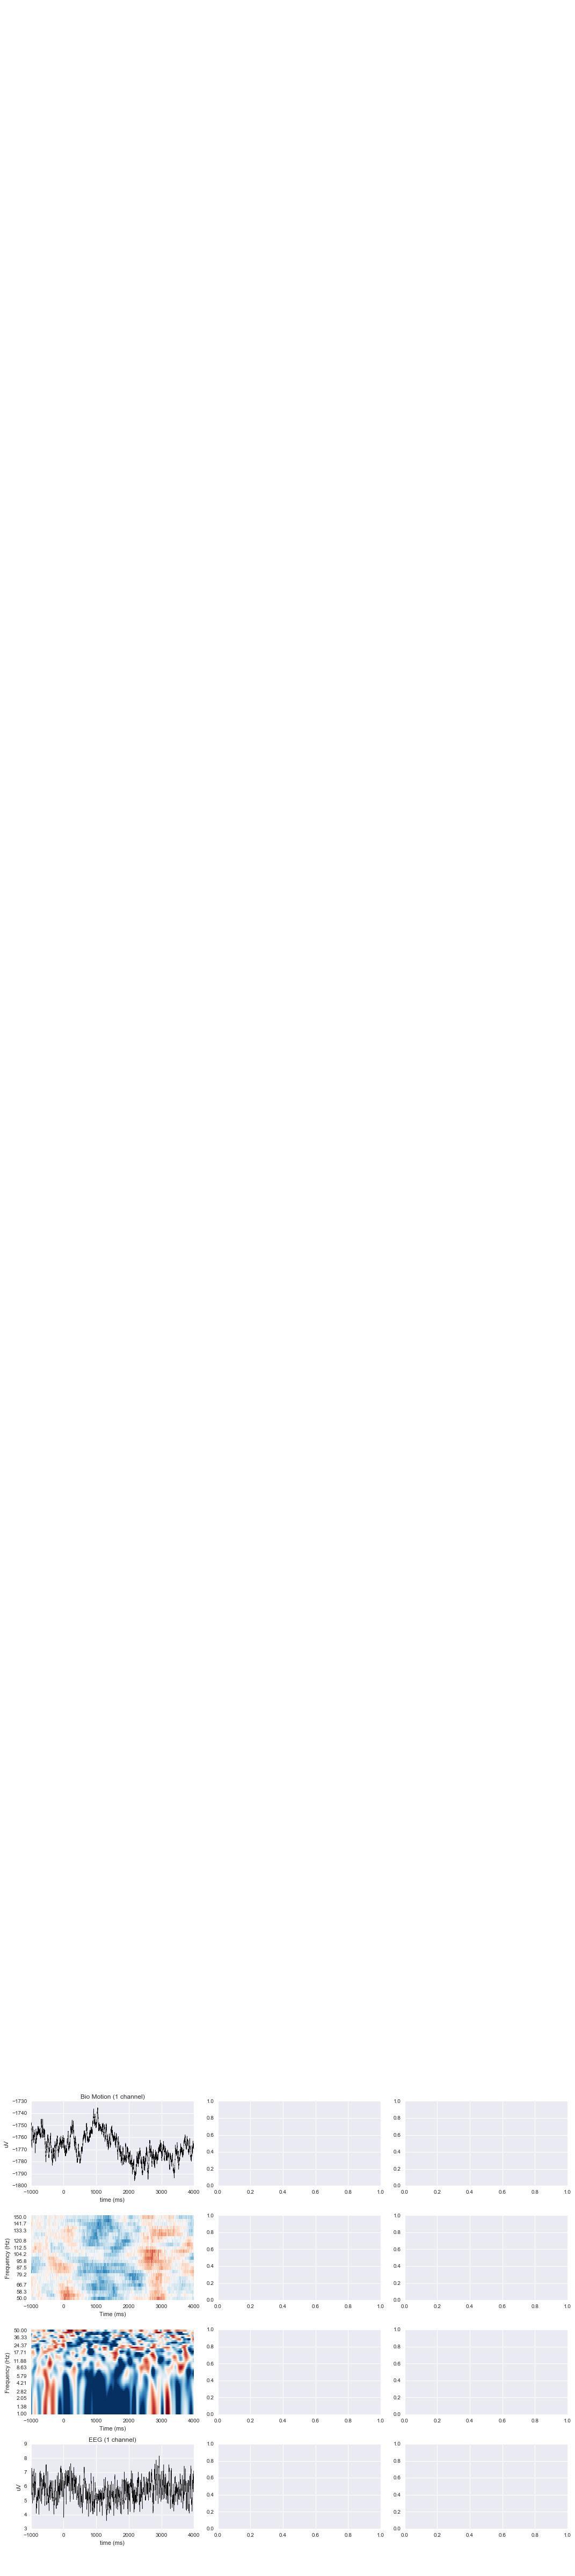

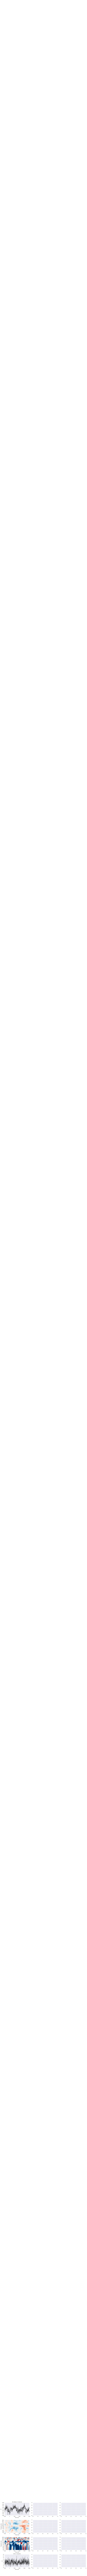

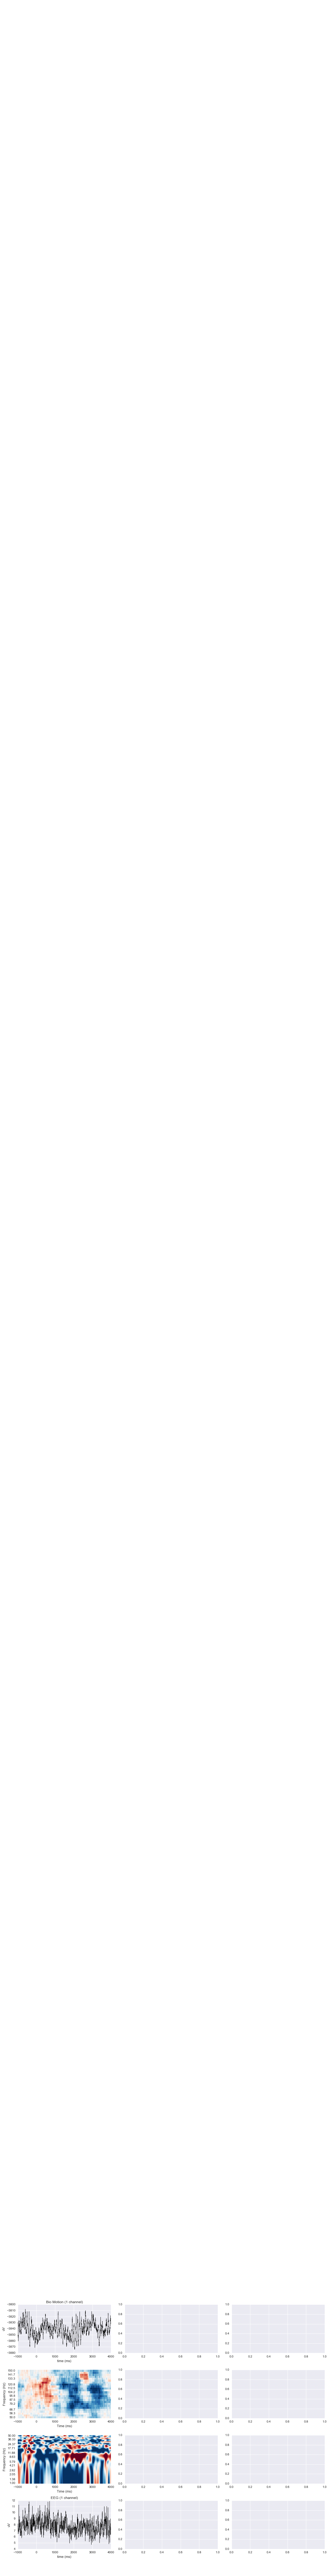

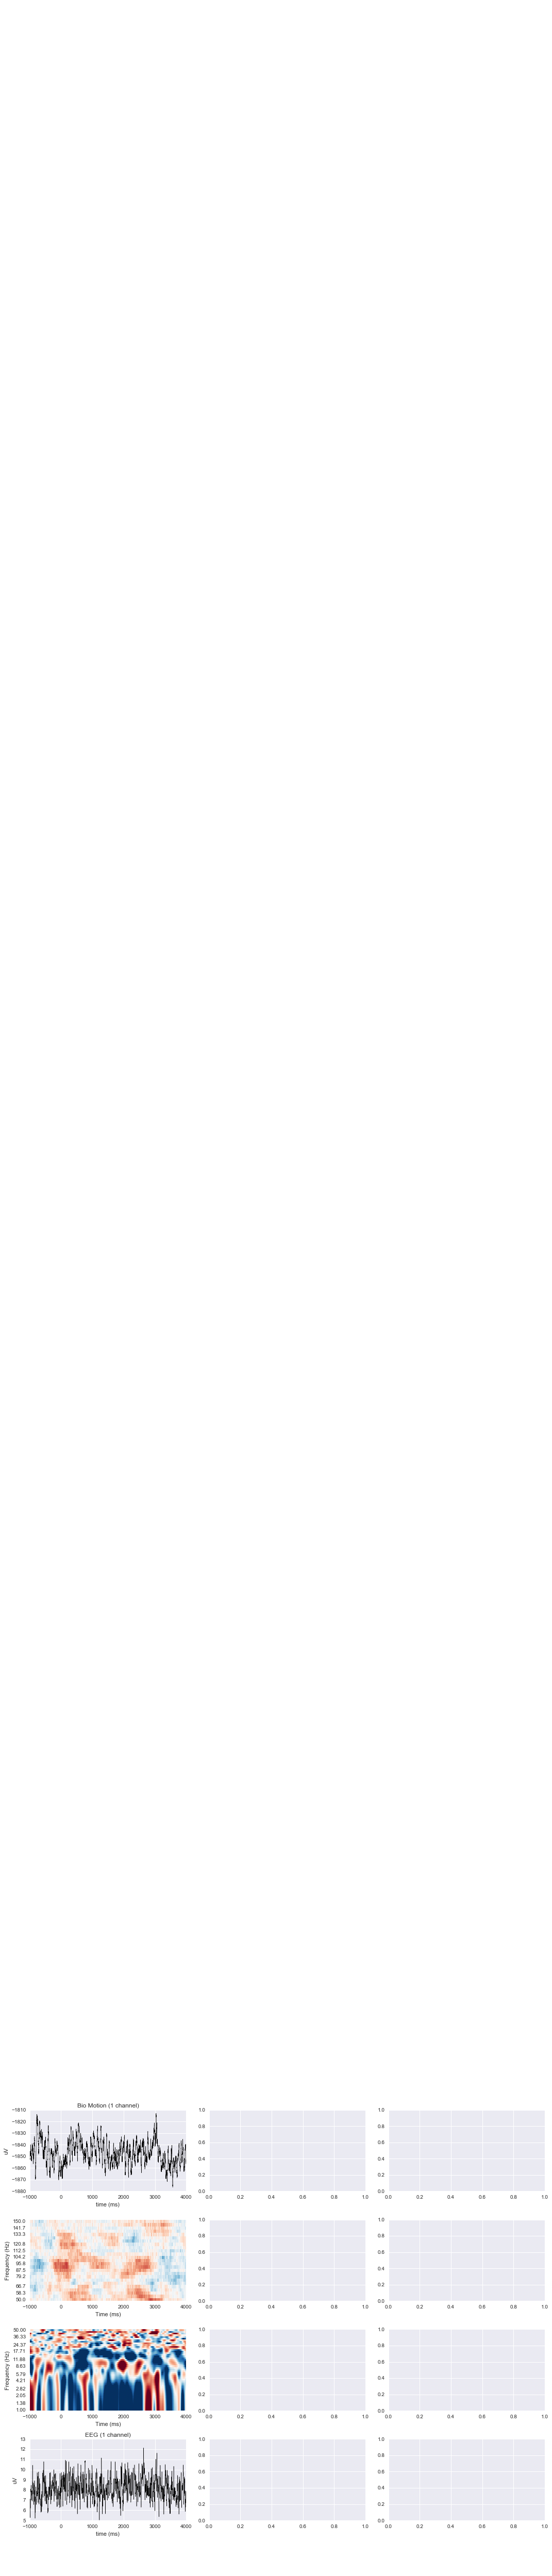

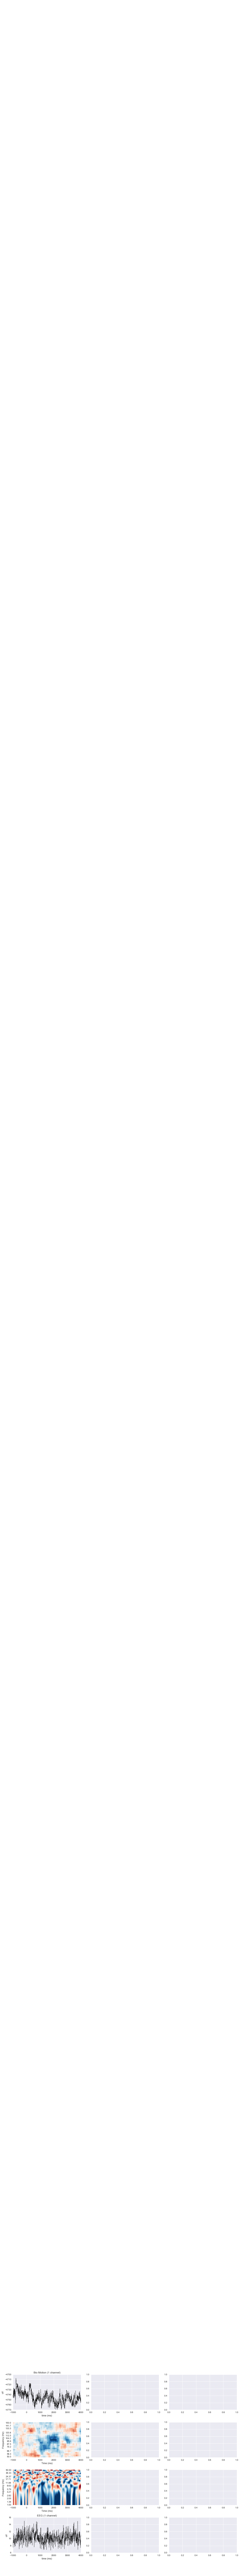

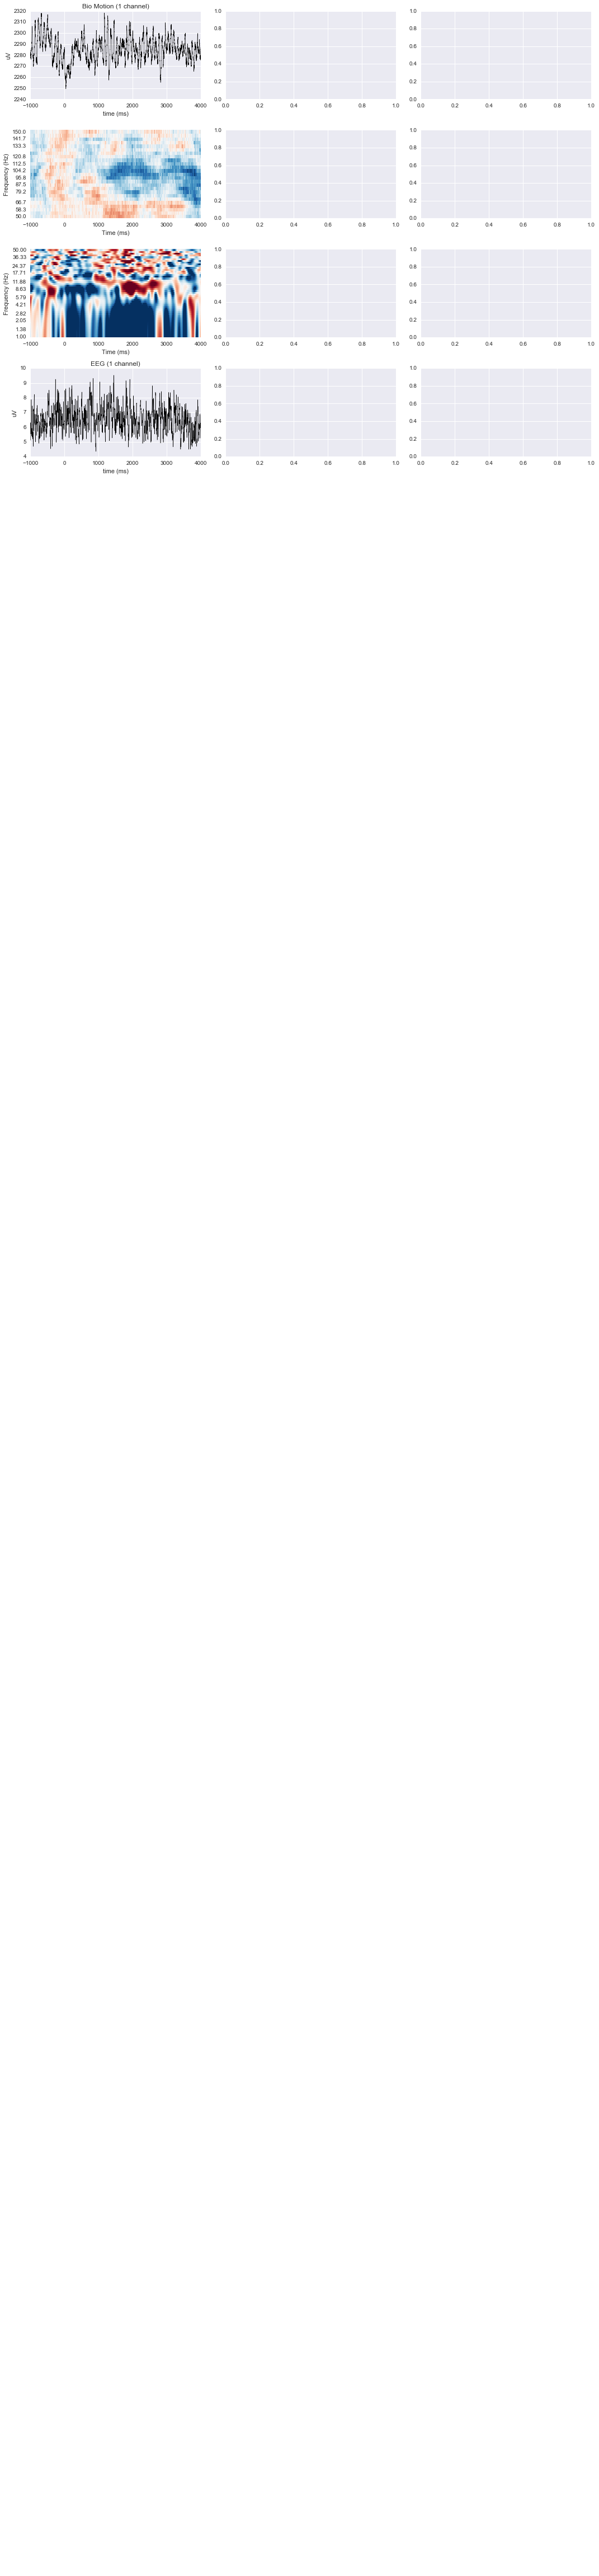

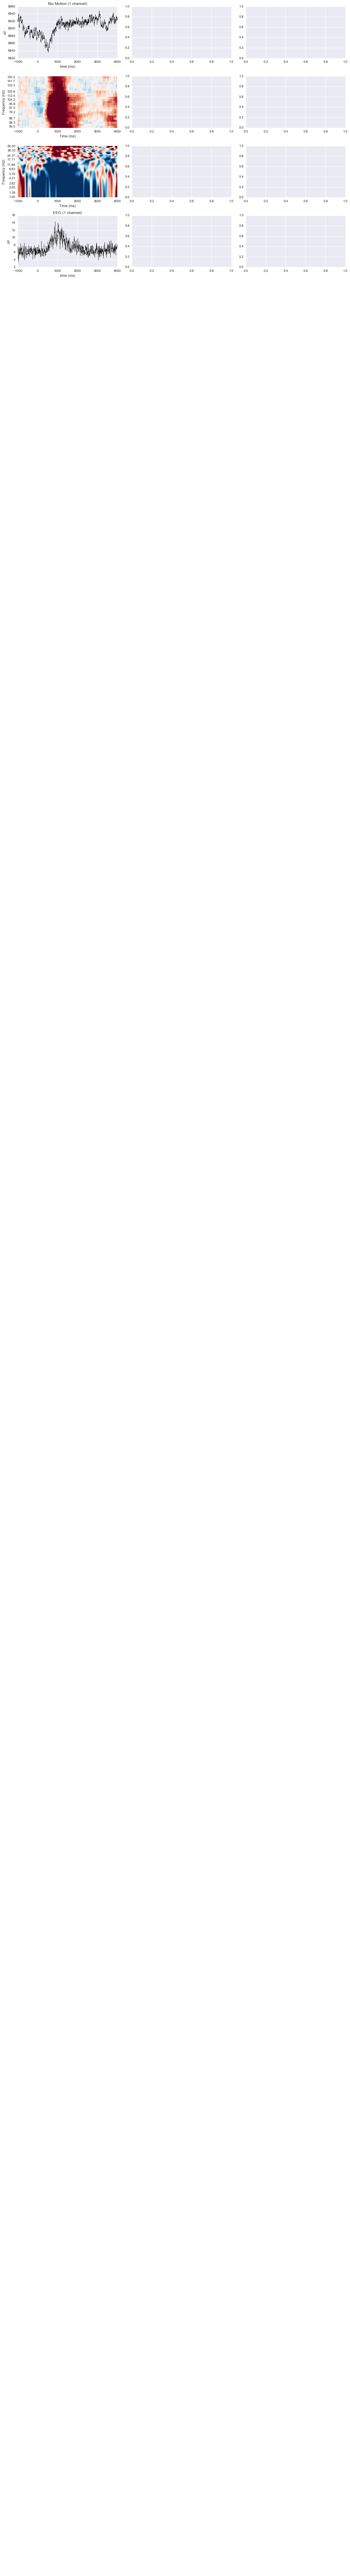

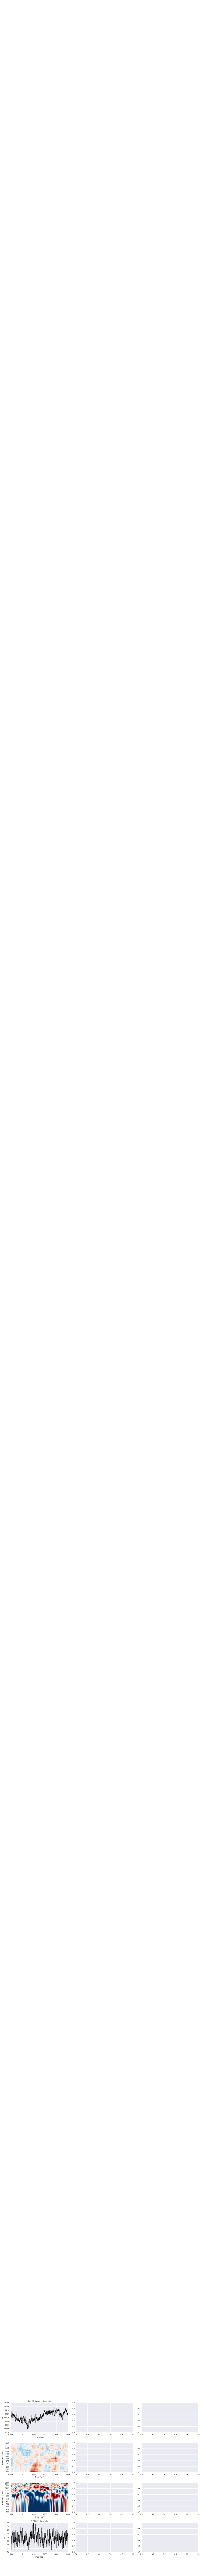

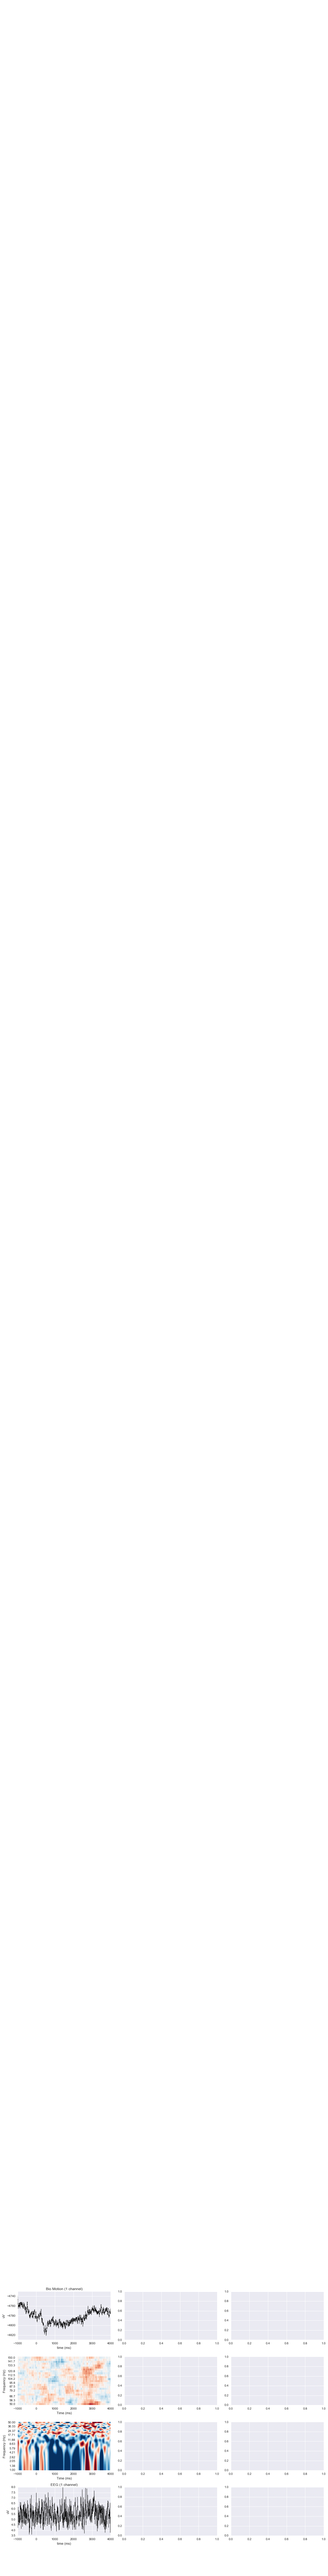

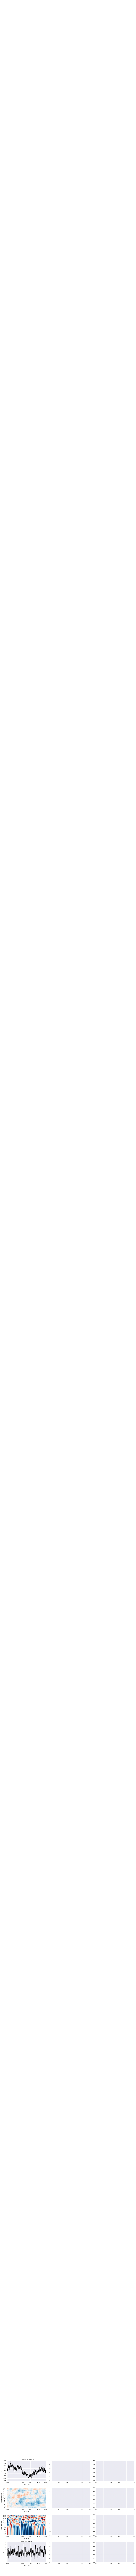

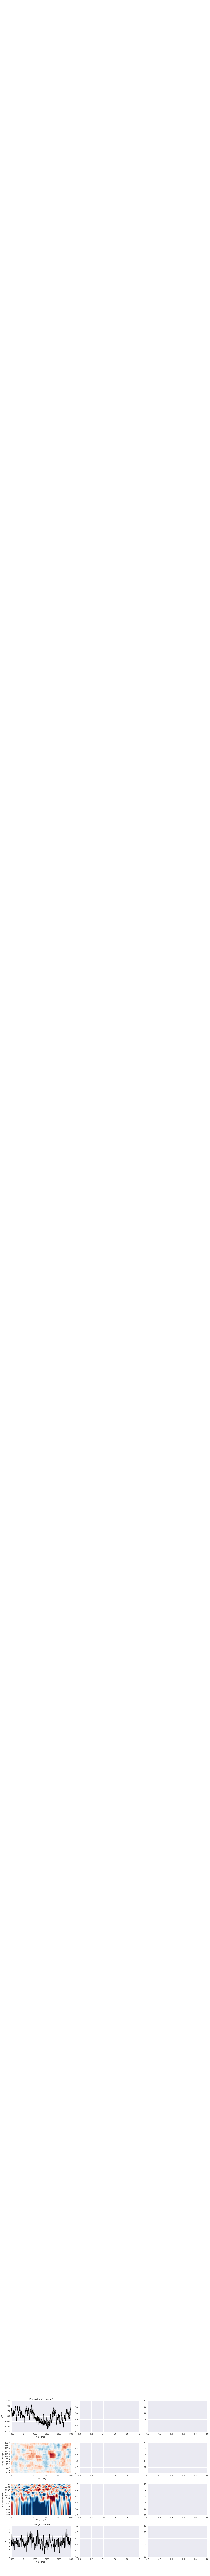

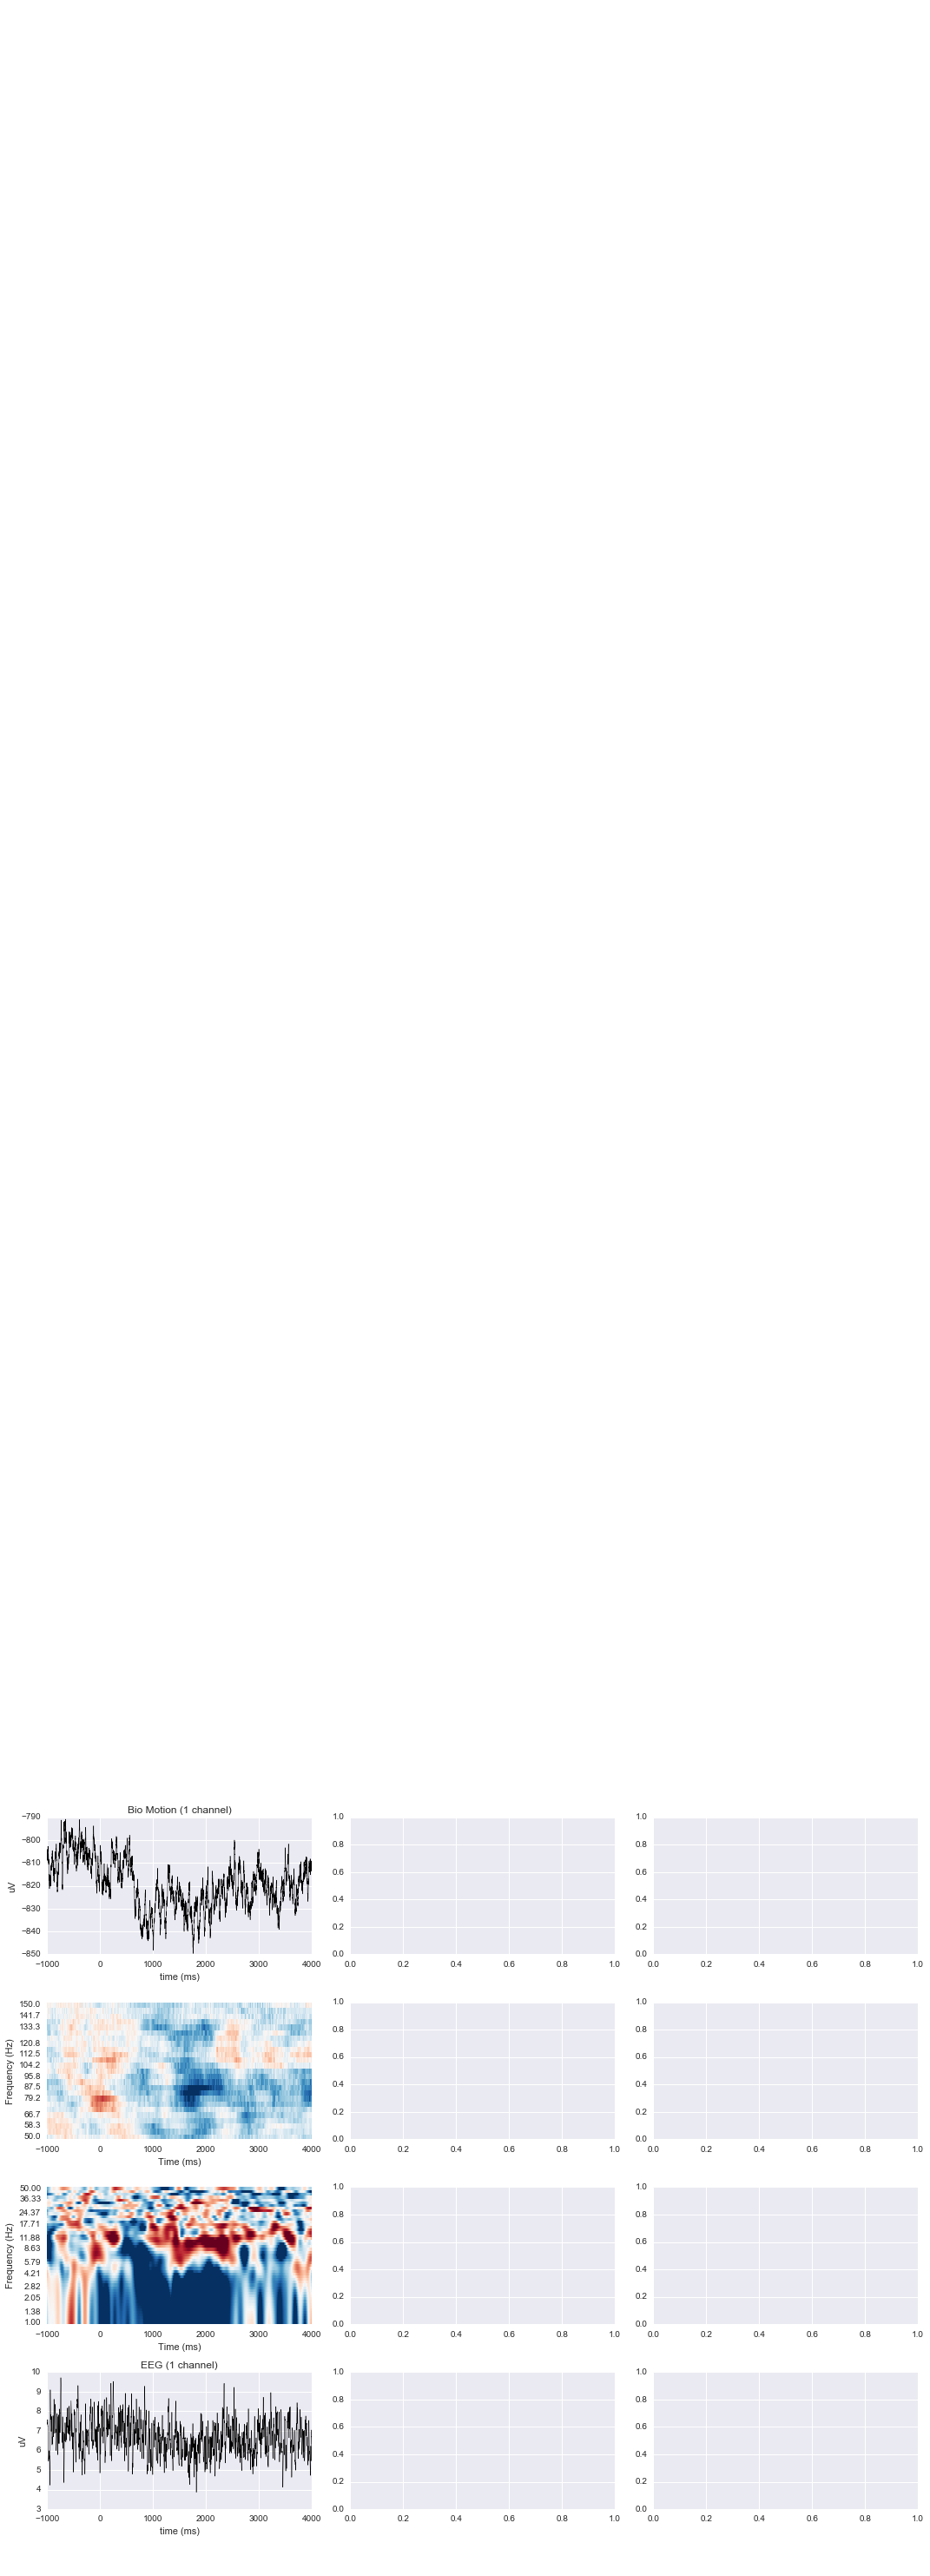

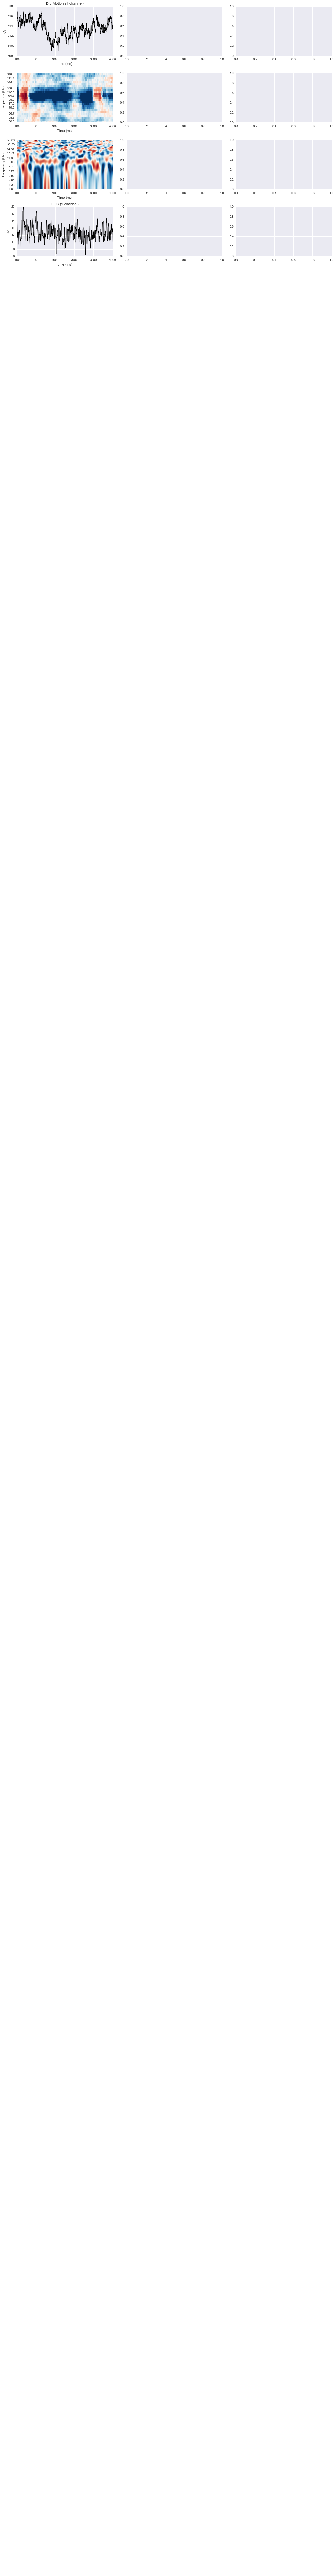

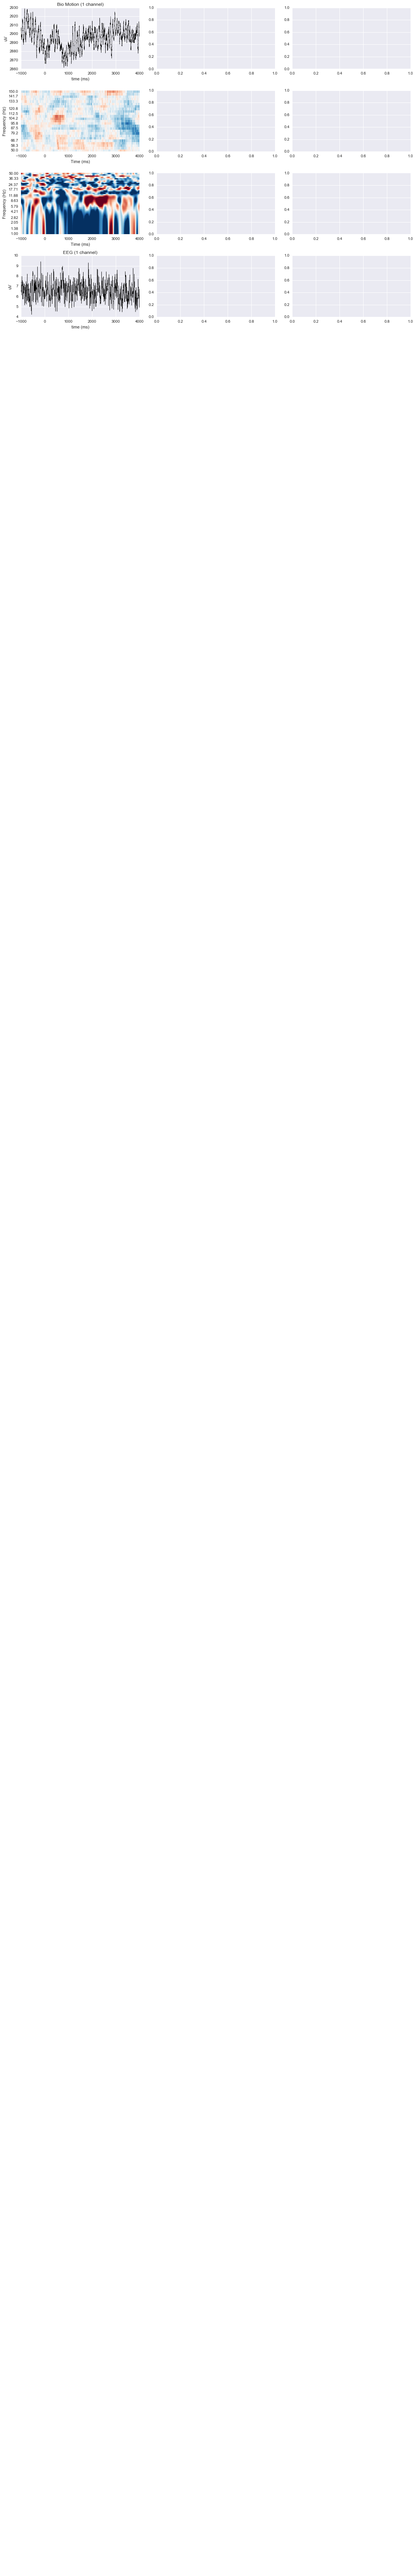

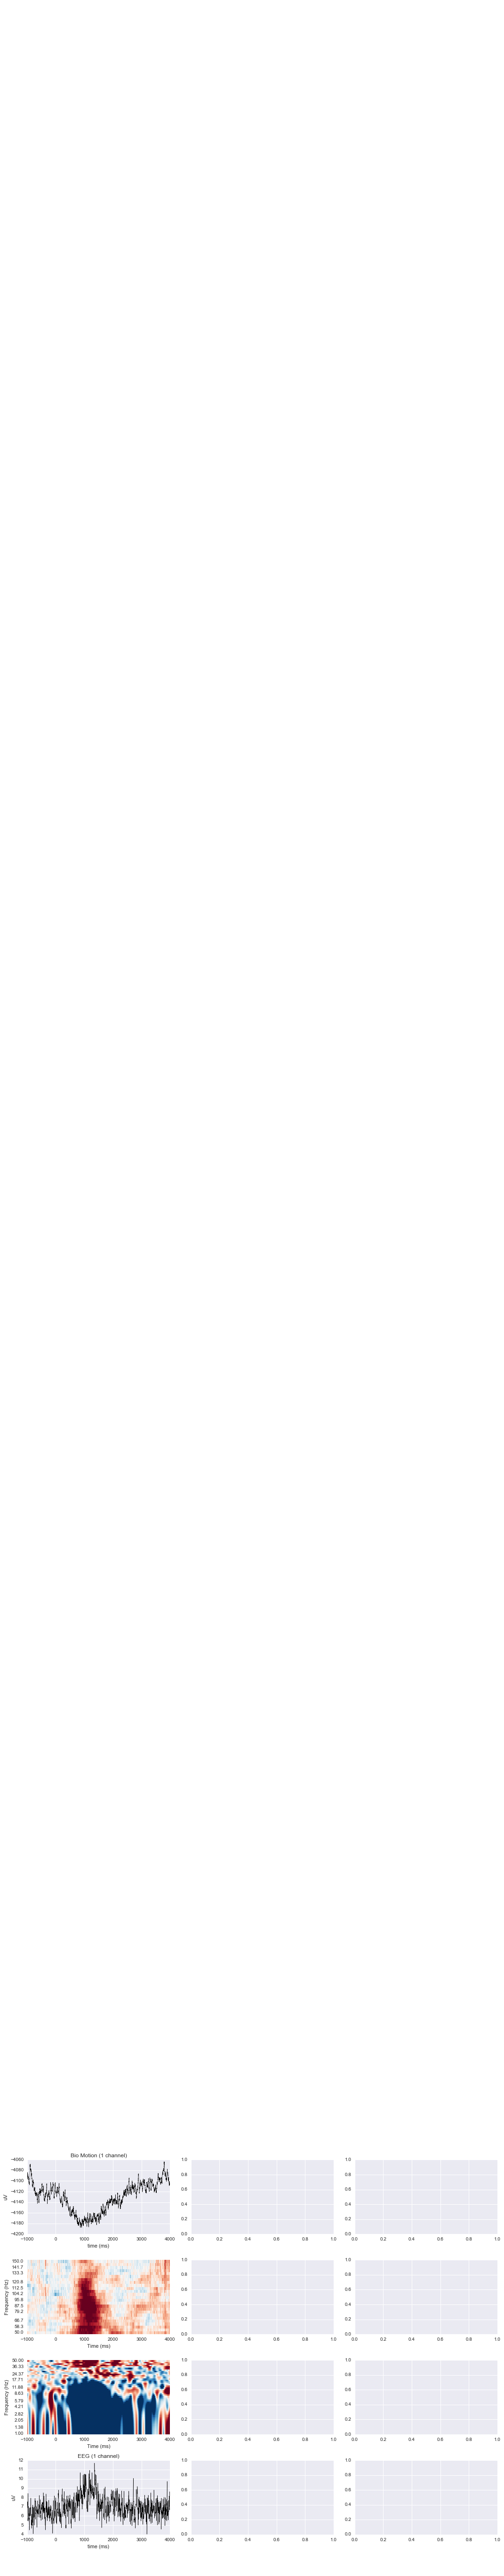

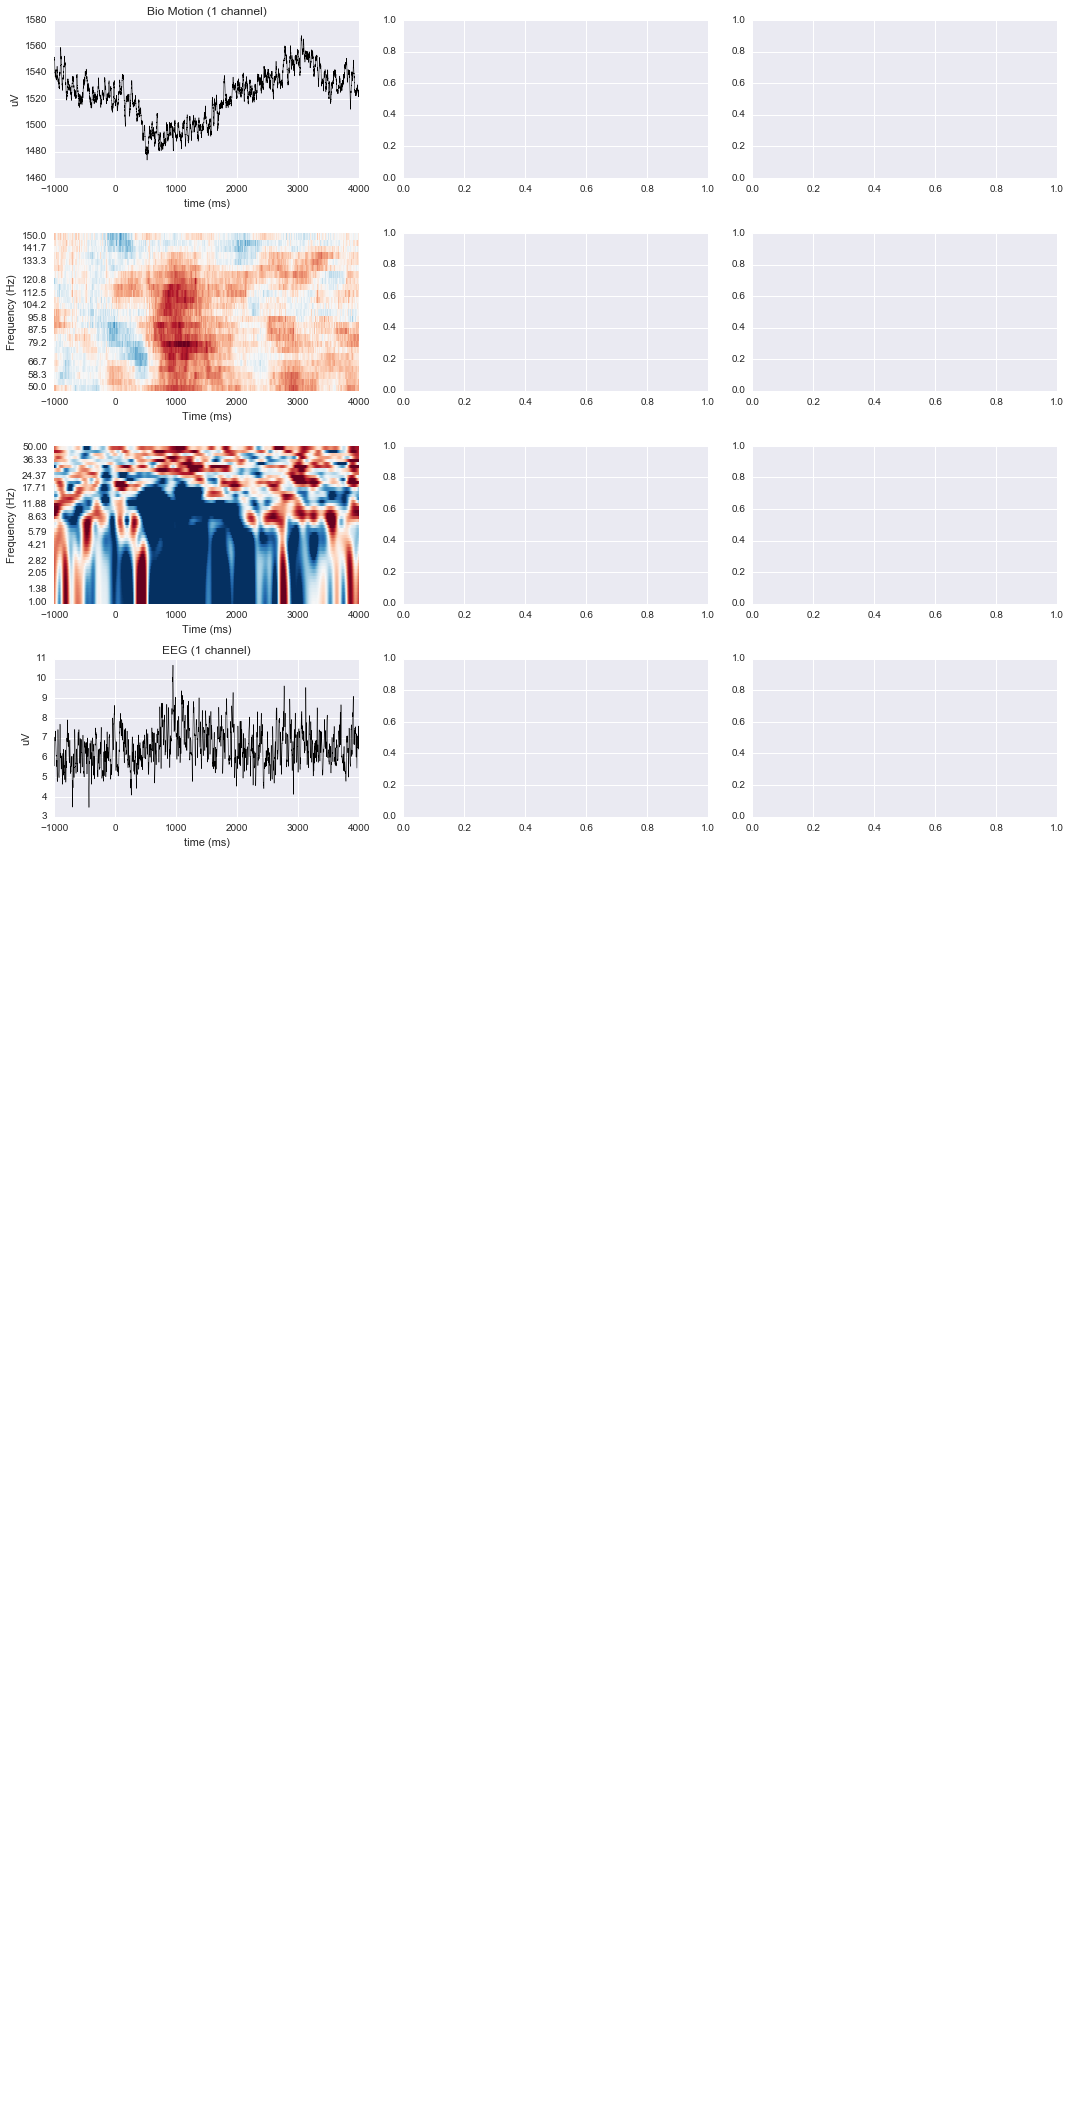

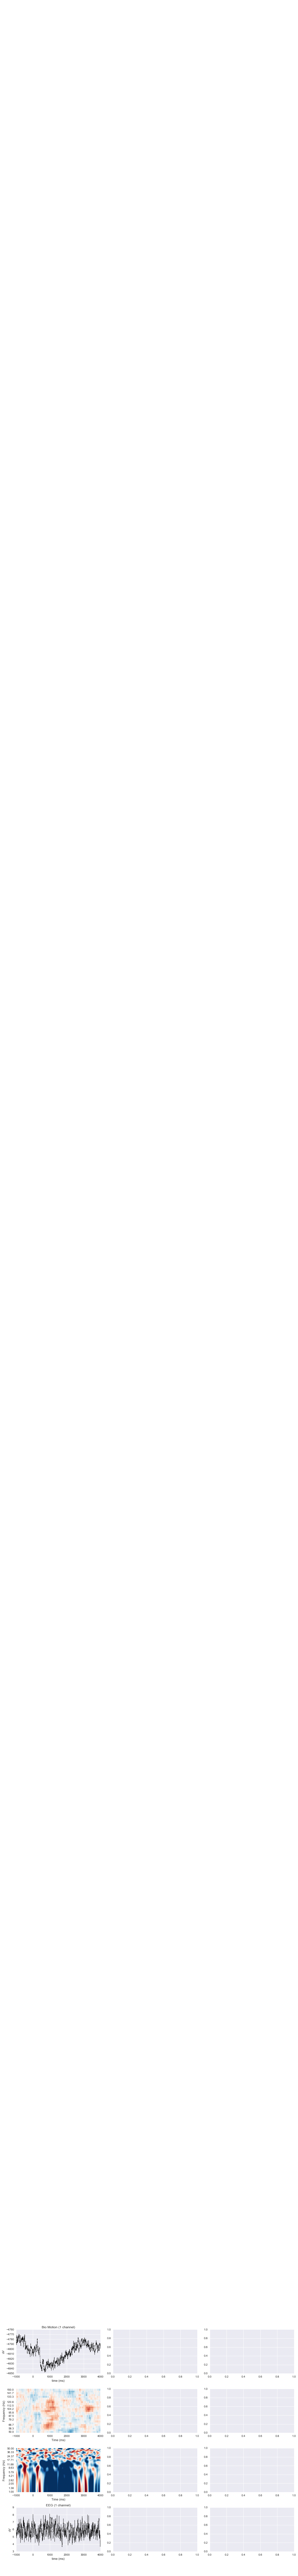

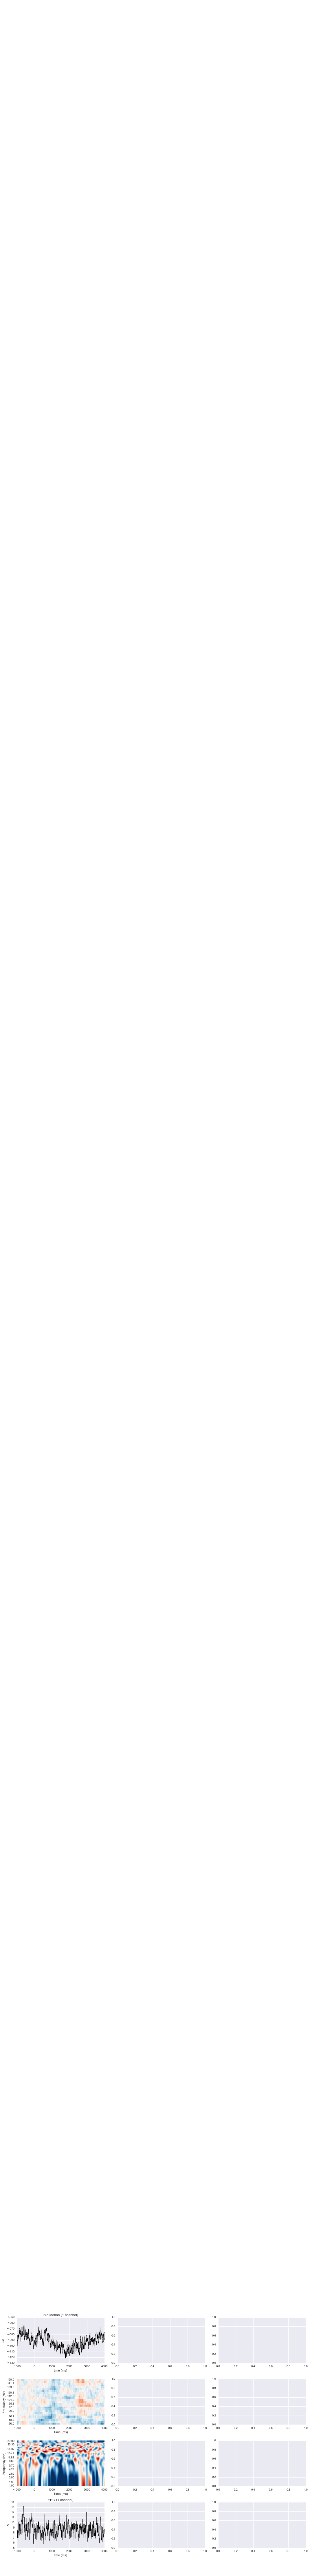

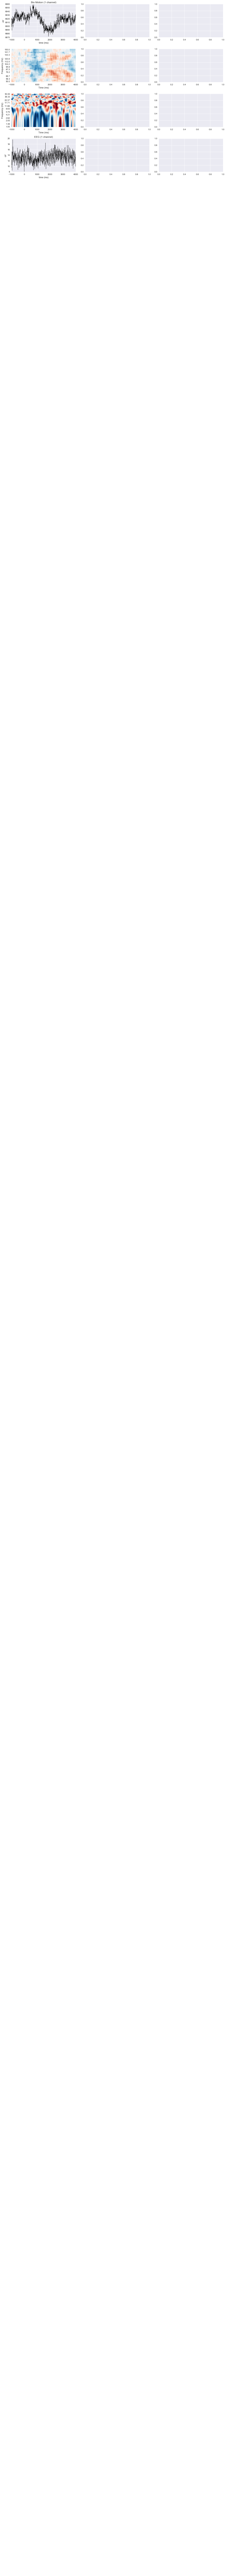

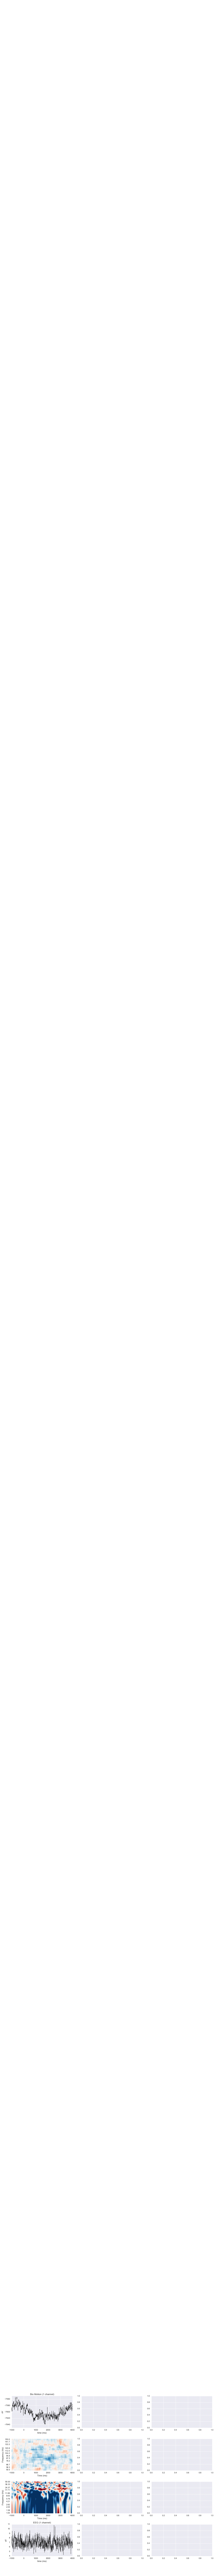

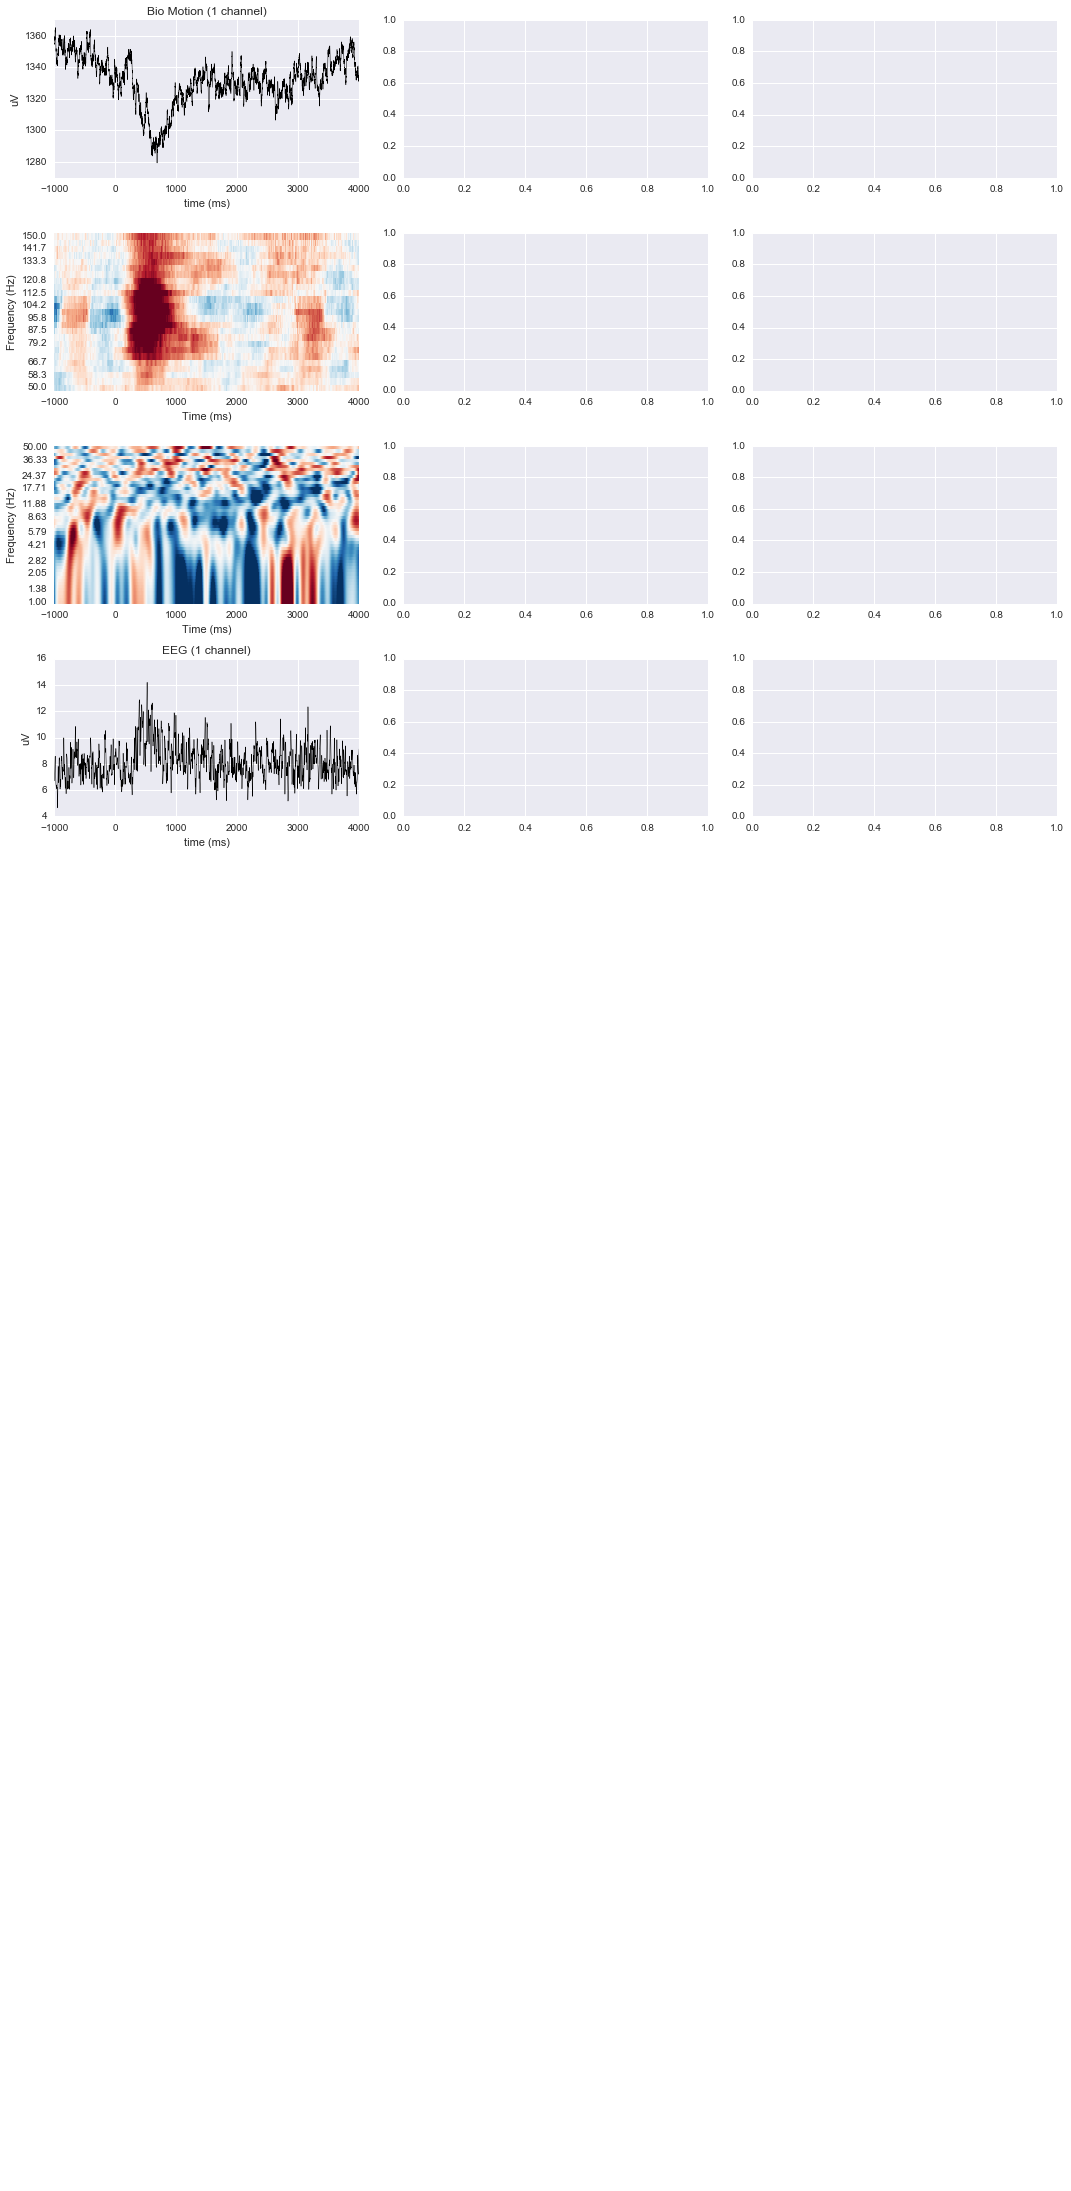

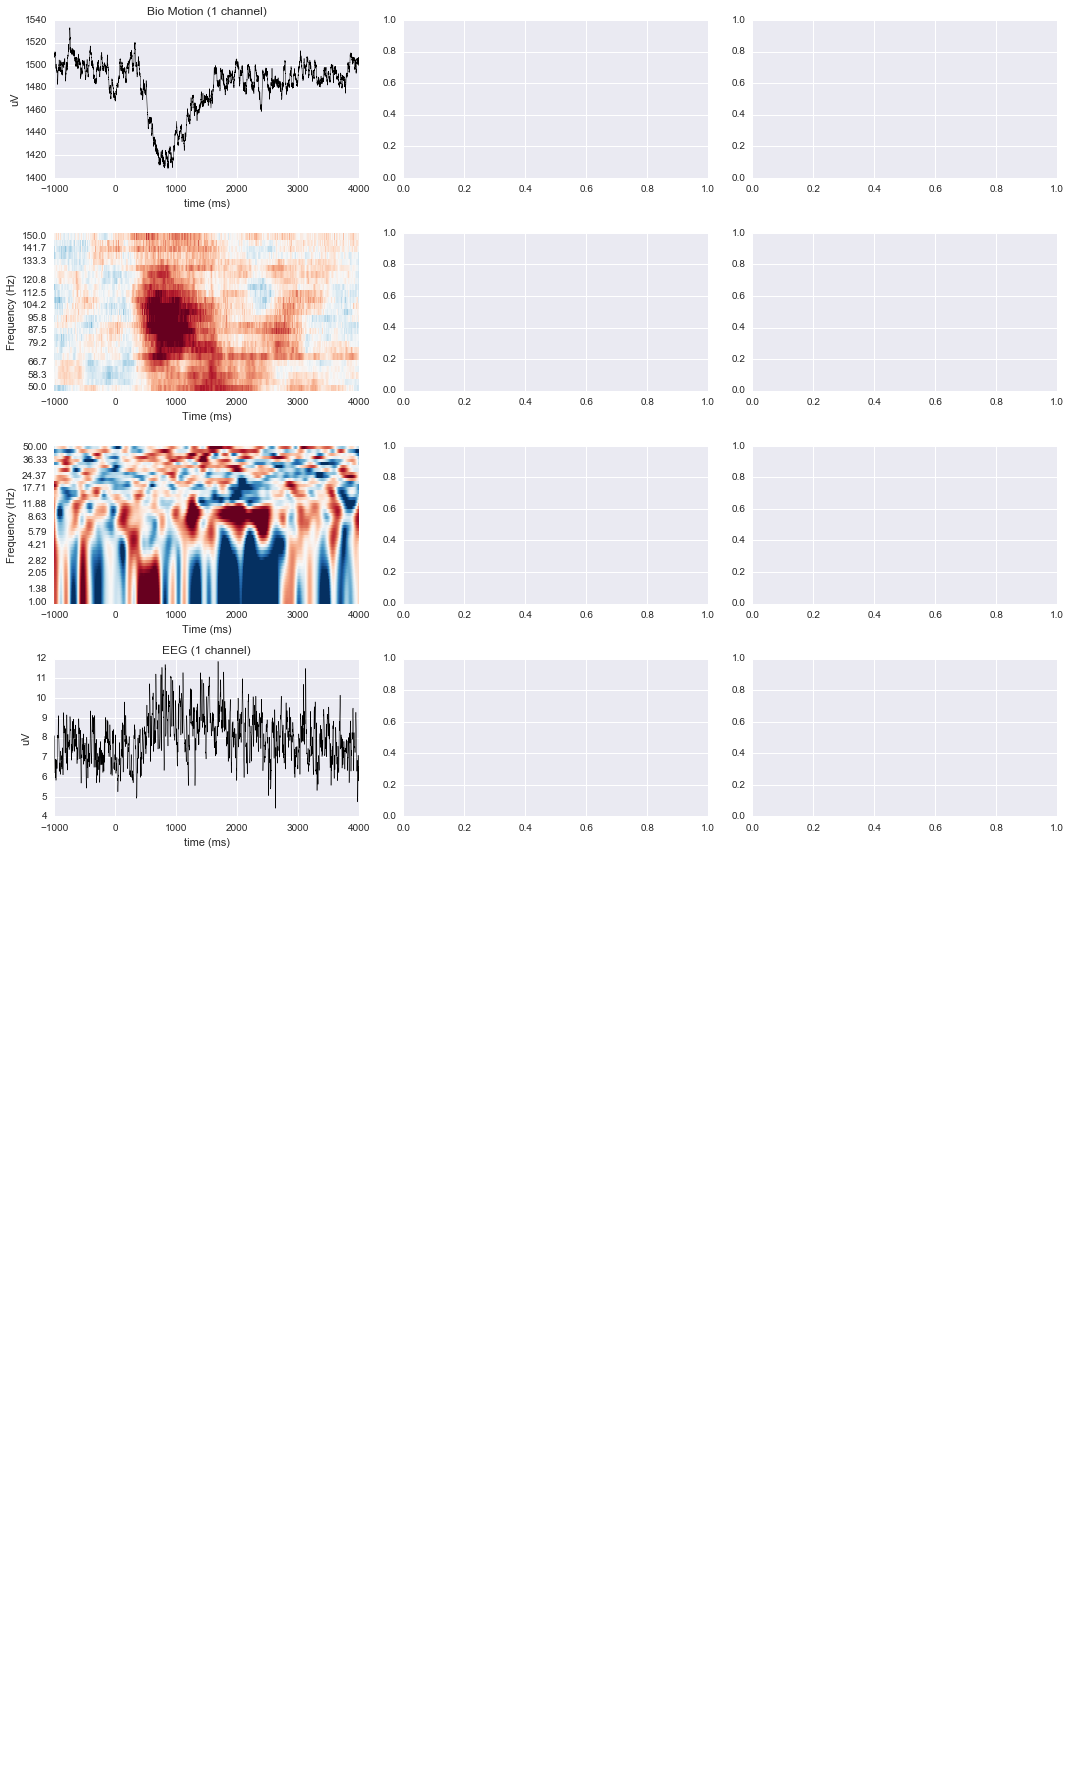

In [20]:
# Times and baseline periods for QS

for channel in channels:
    channel_of_interest = channel
    index = channels.index(channel_of_interest)
    COI = [index]
    
    f, axes = plt.subplots(4, 3, figsize=(15,12))

    bio_dir_evoked.crop(**QS_times).plot(COI, axes=axes[0,0], show=False, titles="Bio Motion");
    #contr_dir_evoked.crop(**QS_times).plot(COI, axes=axes[0, 1], show=False, titles="Control Motion");
    #QS_evoked.crop(**QS_times).plot(COI, axes=axes[0, 2], show=False, titles="COMBINED");

    bio_dir_power.plot(COI, baseline=QS_baseline, mode='ratio', dB=True, vmin=-5., vmax=5., **QS_times, axes=axes[1, 0], show=False, colorbar=False);
    #contr_dir_power.plot(COI, baseline=QS_baseline, mode='ratio', dB=True, vmin=-5., vmax=5., **QS_times, axes=axes[1, 1], show=False, colorbar=False);
    #QS_power.plot(COI, baseline=QS_baseline, mode='ratio', dB=True, vmin=-5., vmax=5., **QS_times, axes=axes[1, 2], show=False, colorbar=False);

    low_bio_dir_power.plot(COI, baseline=QS_baseline, mode='ratio', dB=True, vmin=-5., vmax=5., **QS_times, axes=axes[2, 0], show=False, colorbar=False);
    #low_contr_dir_power.plot(COI, baseline=QS_baseline, mode='ratio', dB=True, vmin=-5., vmax=5., **QS_times, axes=axes[2, 1], show=False, colorbar=False);
    #low_QS_power.plot(COI, baseline=QS_baseline, mode='ratio', dB=True, vmin=-5., vmax=5., **QS_times, axes=axes[2, 2], show=False, colorbar=False);    
        
    bio_dir_evoked_filt.crop(**QS_times).plot(COI, axes=axes[3, 0], show=False);
    #contr_dir_evoked_filt.crop(**QS_times).plot(COI, axes=axes[3, 1], show=False);
    #QS_filt.crop(**QS_times).plot(COI, axes=axes[3, 2], show=False);

    f.savefig("patient_"+patient_num+'/Bio_Motion_plots/' + channel_of_interest + ".png")



# Messing around for single trials


Applying baseline correction (mode: ratio)
Applying baseline correction (mode: ratio)
Applying baseline correction (mode: ratio)
Applying baseline correction (mode: ratio)


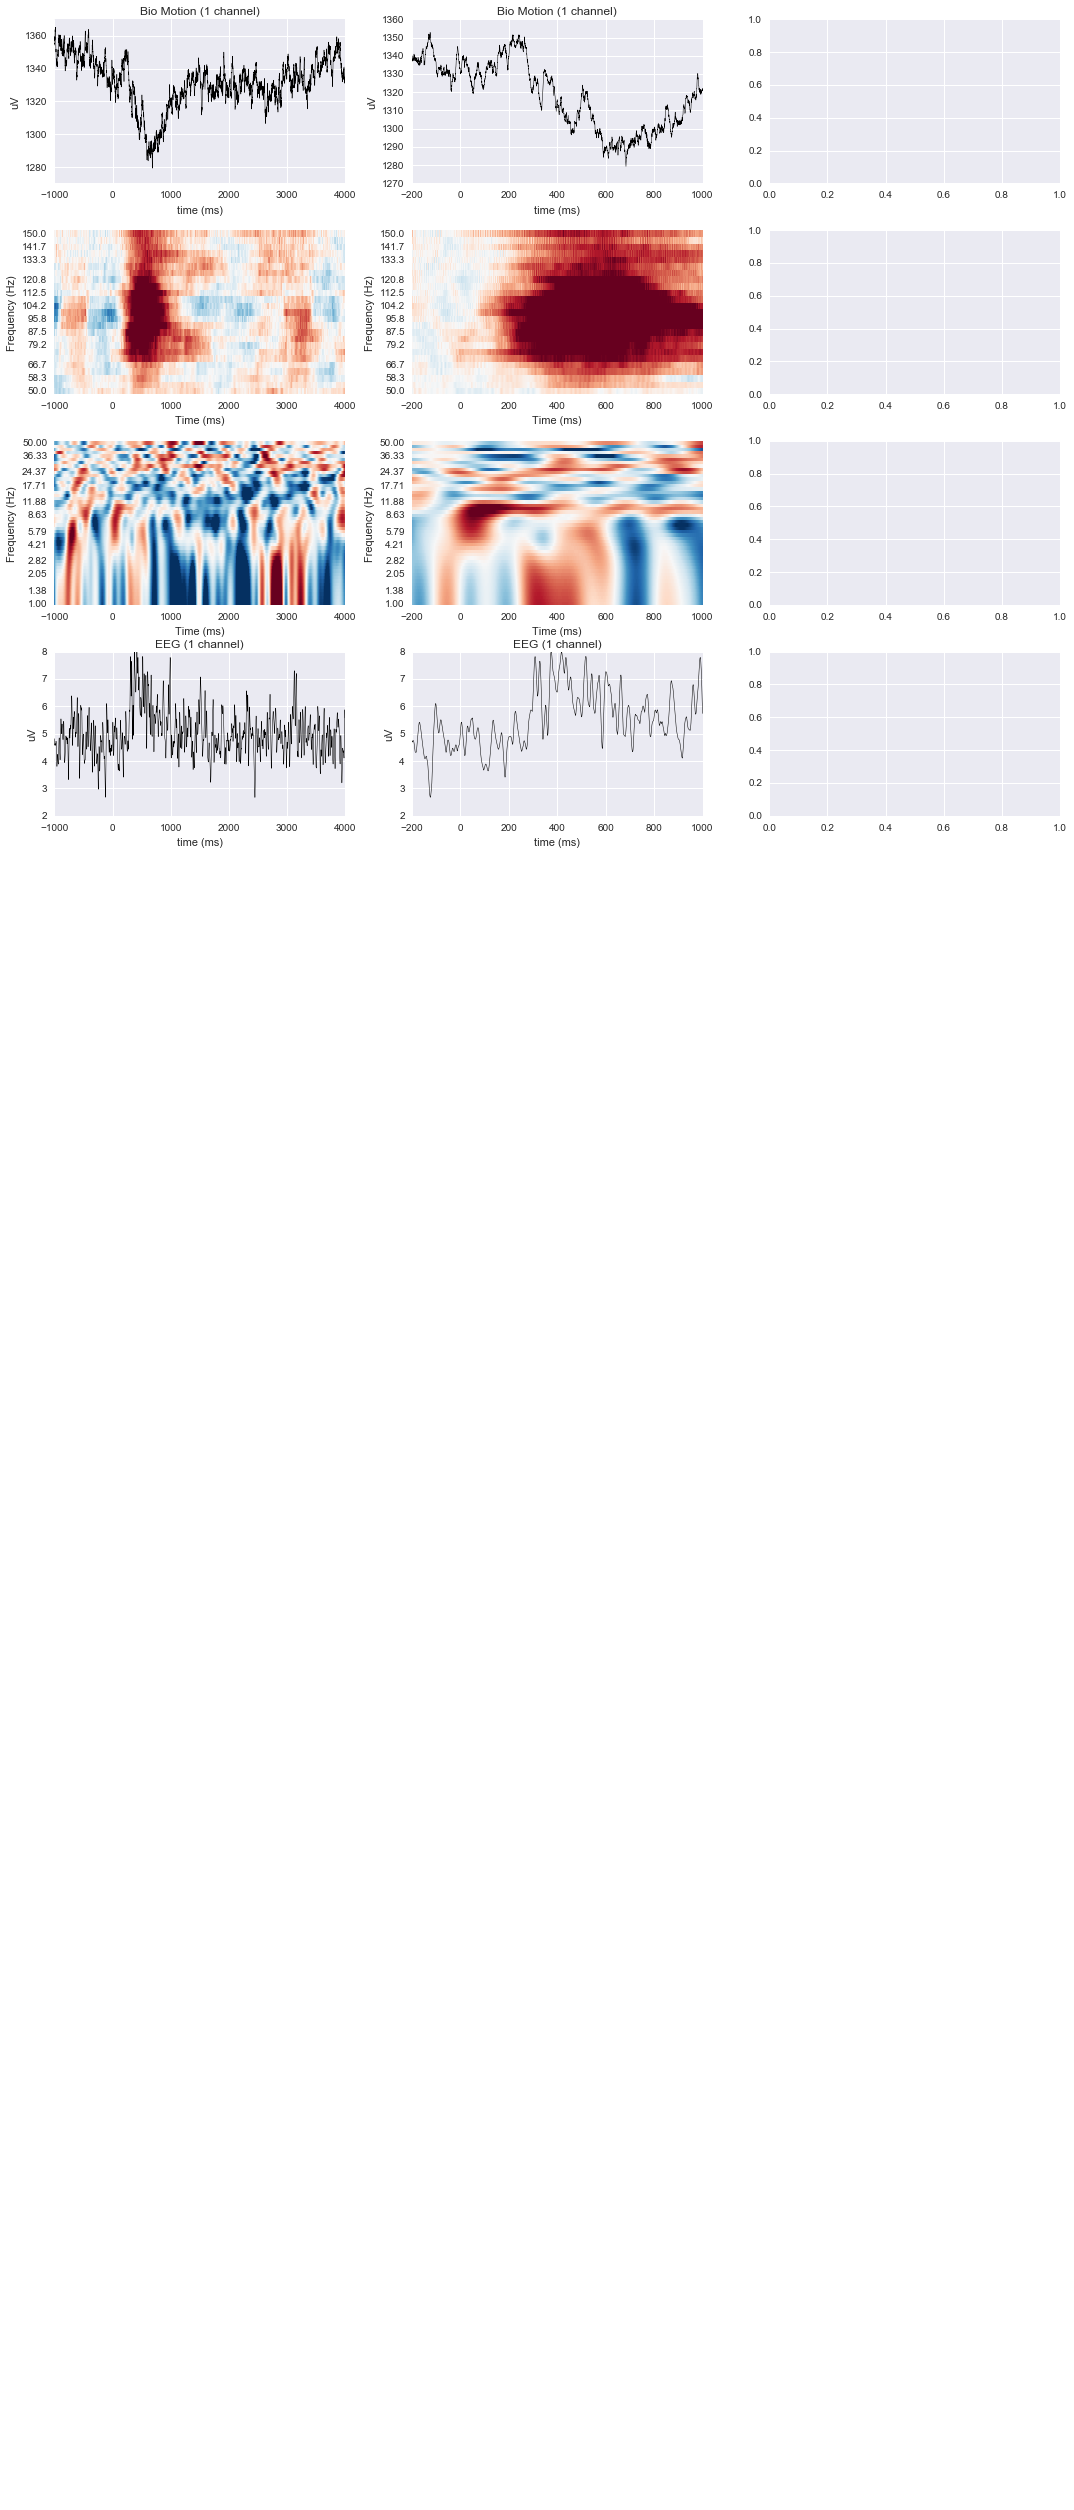

In [33]:
shorttime = {"tmin":-1., "tmax":4.}
shorttimebaseline = (-1., 0)

QS_times = {"tmin":-0.2, "tmax":1.}
QS_baseline = (-0.2, 0)

channel_of_interest = "RTG31"
index = channels.index(channel_of_interest)
COI = [index]

f, axes = plt.subplots(4, 3, figsize=(15,12))

bio_dir_evoked.crop(**shorttime).plot(COI, axes=axes[0,0], show=False, titles="Bio Motion");
bio_dir_evoked_filt.crop(**shorttime).plot(COI, axes=axes[3, 0], show=False);

bio_dir_evoked.crop(**QS_times).plot(COI, axes=axes[0,1], show=False, titles="Bio Motion");
bio_dir_evoked_filt.crop(**QS_times).plot(COI, axes=axes[3, 1], show=False);
#bio_dir_evoked.crop(**QS_times).plot(COI, axes=axes[0,1], show=False, titles="Bio Motion");
#contr_dir_evoked.crop(**QS_times).plot(COI, axes=axes[0, 1], show=False, titles="Control Motion");
#QS_evoked.crop(**QS_times).plot(COI, axes=axes[0, 2], show=False, titles="COMBINED");

bio_dir_power.plot(COI, baseline=shorttimebaseline, mode='ratio', dB=True, vmin=-5., vmax=5., **shorttime, axes=axes[1, 0], show=False, colorbar=False);
bio_dir_power.plot(COI, baseline=QS_baseline, mode='ratio', dB=True, vmin=-5., vmax=5., **QS_times, axes=axes[1, 1], show=False, colorbar=False);

#contr_dir_power.plot(COI, baseline=QS_baseline, mode='ratio', dB=True, vmin=-5., vmax=5., **QS_times, axes=axes[1, 1], show=False, colorbar=False);
#QS_power.plot(COI, baseline=QS_baseline, mode='ratio', dB=True, vmin=-5., vmax=5., **QS_times, axes=axes[1, 2], show=False, colorbar=False);

low_bio_dir_power.plot(COI, baseline=shorttimebaseline, mode='ratio', dB=True, vmin=-5., vmax=5., **shorttime, axes=axes[2, 0], show=False, colorbar=False);
low_bio_dir_power.plot(COI, baseline=QS_baseline, mode='ratio', dB=True, vmin=-5., vmax=5., **QS_times, axes=axes[2, 1], show=False, colorbar=False);

#low_contr_dir_power.plot(COI, baseline=QS_baseline, mode='ratio', dB=True, vmin=-5., vmax=5., **QS_times, axes=axes[2, 1], show=False, colorbar=False);
#low_QS_power.plot(COI, baseline=QS_baseline, mode='ratio', dB=True, vmin=-5., vmax=5., **QS_times, axes=axes[2, 2], show=False, colorbar=False);    


#bio_dir_evoked_filt.crop(**QS_times).plot(COI, axes=axes[3, 1], show=False);
#contr_dir_evoked_filt.crop(**QS_times).plot(COI, axes=axes[3, 1], show=False);
#QS_filt.crop(**QS_times).plot(COI, axes=axes[3, 2], show=False);

f.savefig("patient_"+patient_num+'/Bio_Motion_plots/' + channel_of_interest + ".png")